In [723]:
import os
import sys
sys.path.insert(0, os.path.abspath('/Users/isabellelorge/Desktop/reddit_project/'))
from reddit_analyses import extract_phrases
from reddit_analyses import bert_predictions
import pandas as pd
temporal = [' never', 'occasionally', 'sometimes', 'often', 'frequently', 'generally', 'usually', 'always']
factual = ['maybe',  'perhaps', 'possibly', 'arguably', 'probably', 'actually', 'certainly', 'definitely']
other = ['hardly', 'slightly', 'basically',  'pretty', 'quite', 'very', 'really','completely'] 
# swapped 'pretty' and 'quite', as per Taboada et al. (2011) rankings 
# should put very up as per Ruppenhofer et al 2015
deg_adv = temporal + factual + other

# source_dir = '/Users/isabellelorge/Desktop/reddit_data/zipped_files'
# target_dir = '/Users/isabellelorge/Desktop/reddit_data/zipped_files/arguably'
# files =  ['01', '02', '03', '04', '05', '06', '07', '09', '10', '11', '12']
# extract_phrases.get_reddit_comments(deg_adv=['arguably'], files=files, source_dir=source_dir, target_dir=target_dir)
# df_old = pd.read_csv('/Users/isabellelorge/Desktop/new_dataset_occasionally.csv')

In [704]:
# train_fine = pd.read_csv('/Users/isabellelorge/Desktop/finetune/small_train.csv', lineterminator = '\n')
# test_fine = pd.read_csv('/Users/isabellelorge/Desktop/finetune/small_test.csv', lineterminator = '\n')

In [712]:
# train_fine.to_csv('/Users/isabellelorge/Desktop/finetune/small_train.csv')
# test_fine.to_csv('/Users/isabellelorge/Desktop/finetune/small_test.csv')

In [728]:
# train_fine.to_csv('/Users/isabellelorge/Desktop/finetune/small_train_test.csv')
# test_fine.to_csv('/Users/isabellelorge/Desktop/finetune/small_test_test.csv')

In [729]:
# sent = []
# for idx, s in test_fine['sentences'].iteritems():
#     l = test_fine['labels'].loc[idx]
#     print(l)
#     words = s.split()
#     if l ==1:
#         a = words[-2]
#         print(a)
#         words[-5] = a
#     else:
#         r = random.choice(deg_adv)
#         print(r)
#         words[-5] = r
#     new = ' '.join(words)
#     print(new)
#     sent.append(new)
# test_fine['sentences'] = sent

In [144]:
# df_new.to_csv('/Users/isabellelorge/Desktop/new_dataset_arguably.csv')
# df_new.to_pickle('/Users/isabellelorge/Desktop/new_dataset_arguably.pkl')

In [692]:
df_arguably = pd.read_pickle('/Users/isabellelorge/Desktop/new_dataset_arguably.pkl')

In [694]:
for s in df_arguably['sentences']:
    print(s)

Making something less alkaline does not make it acidic.  Referring to ocean acidification as if it were possible, or even something that was happening, is not scientific, we can make the ocean less alkaline, maybe, but never acidic.
And good at everything.  But during a hire, you are never sure.
Shorter Krugman: Ron Paul is amazing, because unlike a stopped clock that is at least correct time twice a day, if by accident, Ron Paul is never correct.
I said a policy cannot be racist if it diminishes racial inequality.  Racism is never beneficial.
Of course, yes, and I wouldn't be so bold as to insist my arguments are never fallacious.
This is pretty damming evidence that her "respectful tone" comment was never honest.
The province was a Dutch colony until it was transferred to Indonesia via the UN.  It was never independent.
This is pseudo science at best. Social science is never concrete.
Without nations, there would be no high technology.  Anarchy is never peaceful.
Torture is never leg

In [349]:
# df_arguably[['adv_exp', 'sentences']].to_csv('/Users/isabellelorge/Desktop/appendix_data/original_naturalistic.csv')

In [24]:
# df_arguably = pd.read_csv(f'{target_dir}/final_df.csv')
# df = extract_phrases.extract_unstacked_phrases_and_context(['arguably'], df_arguably)

In [3]:
# import re
# df_filt = df[df['sentences'].str.contains(' arguably')].reset_index(drop=True)
# df_filt = df_filt.drop_duplicates(subset='sentences').reset_index(drop=True)
# pattern = '^\. |.*/.*\)|^ png\)'
# df_filt['sentences'] = df_filt['sentences'].apply(lambda x: re.sub(pattern, '', x))
# df_filt = df_filt[df_filt['sentences'].apply(lambda x: len(x.split()) > 6)].reset_index(drop = True)

In [25]:
# df_sample = extract_phrases.create_sample_dataset(df_filt, deg_adv = ['arguably']).reset_index(drop=True)
# df_sample = df_sample.drop('index', axis = 1)
# df_old = df_old[~df_old['adv_exp'].str.contains("'seriously'")]
# df_old = df_old[['adv_exp', 'sentences']]
# df_arg = pd.concat([df_old, df_sample])
# df_arg.to_csv('/Users/isabellelorge/Desktop/new_dataset_arguably.csv')

In [677]:
from reddit_analyses.bert_predictions import get_top_k_predictions
import string

# df_new = pd.read_csv('/Users/isabellelorge/Desktop/new_dataset_arguably.csv')

bert_b =[]
bert_b_neutral = []
bert_l = []
bert_l_neutral = []
berta = []
berta_neutral = []
# gpt2 = []
# gpt2_neutral = []

for i, s in df_reduced_int_entail['sent'].iteritems():
# for i, s in df_new['sentences'].iteritems():
    print(i)
    words_bert = s.split()
    words_berta = s.split()
    adv = words_bert[-2]
    adv = adv.translate(str.maketrans('', '', string.punctuation))
#     adv = 'really'
#     adv = new_lex_df['target'].loc[i]
    print(adv)
    if adv in words_bert:
        target_idx = words_bert.index(adv)
    elif adv+'.' in words_bert:
        target_idx = words_bert.index(adv+'.')
    elif adv+',' in words_bert:
        target_idx = words_bert.index(adv+',')
    else:
        print('WORD NOT IN SENTENCE!')
#     target_idx = -2
    words_bert[target_idx] = '[MASK]'
    words_berta[target_idx] = '<mask>'
    
    # make neutral sentences masked 
#     neutral = 'is ' + ' '.join(s.split()[-2:])
    
    neutral_bert = 'is ' + ' '.join(words_bert[-2:])
    neutral_berta = 'is ' + ' '.join(words_berta[-2:])
#     neutral_bert = 'is a [MASK].'
#     neutral_berta = 'is a <mask>.'
    masked_bert = ' '.join(words_bert)
    masked_berta = ' '.join(words_berta)
    
    if masked_bert[-1] != '.':
        masked_bert = masked_bert + '.'
    if masked_berta[-1] != '.':
        masked_berta = masked_berta + '.'
    print(neutral_bert)
    print(masked_bert)

    # take only second part of sentence
#     neutral_bert = masked_bert.split(' then')[0]
#     neutral_berta = masked_berta.split(' then')[0]
#     print(neutral_bert)

#     print(neutral_bert)
#     print(masked_bert)
#     print(masked_berta)
#     gpt_s = s.split()
#     gpt_s[-2] = adv
#     gpt_sent = ' '.join(gpt_s)
#     neutral_gpt = 'is ' + ' '.join(gpt_s[-2:])
    
    bert_b_p = get_top_k_predictions(masked_bert, target=adv, model_name = 'bert_base')
    bert_b_n = get_top_k_predictions(neutral_bert, target=adv, model_name = 'bert_base')
    bert_l_p = get_top_k_predictions(masked_bert, target=adv, model_name = 'bert_large')
    bert_l_n = get_top_k_predictions(neutral_bert, target=adv, model_name = 'bert_large')
    berta_p = get_top_k_predictions(masked_berta, target=adv, model_name = 'roberta')
    berta_n = get_top_k_predictions(neutral_berta, target=adv, model_name = 'roberta')
#     gpt2_p = get_top_k_predictions(gpt_sent, target=adv, model_name = 'gpt2')
#     gpt2_n = get_top_k_predictions(neutral_gpt, target=adv, model_name = 'gpt2')
    
    print('berta', berta_p)
    print('bertl', bert_l_p)
    
    bert_b.append(bert_b_p)
    bert_b_neutral.append(bert_b_n)
    bert_l.append(bert_l_p)
    bert_l_neutral.append(bert_l_n)
    berta.append(berta_p)
    berta_neutral.append(berta_n)
#     gpt2.append(gpt2_p)
#     gpt2_neutral.append(gpt2_n)

0
occasionally
is [MASK] able.
If it is sometimes able, then it is at least [MASK] able.
berta ((12, 0.008626305), (5, 0.04547705), [(' somewhat', 0.2019997), (' sometimes', 0.20150867), (' partially', 0.10269819), (' mostly', 0.06933153), (' partly', 0.048209015), (' occasionally', 0.04547705), (' half', 0.03405632), (' almost', 0.022345588), (' usually', 0.016532764), (' marginally', 0.012117242)])
bertl ((14, 0.0032817314), (2, 0.060630307), [('sometimes', 0.59105486), ('partly', 0.18695267), ('occasionally', 0.060630307), ('partially', 0.018845102), ('mostly', 0.014255123), ('usually', 0.012859714), ('often', 0.011508458), ('rarely', 0.0071572904), ('always', 0.005664265), ('temporarily', 0.0055595674)])
1
occasionally
is [MASK] bad.
If it is sometimes bad, then it is at least [MASK] bad.
berta ((6, 0.0416385), (5, 0.042663667), [(' always', 0.23600258), (' sometimes', 0.10938734), (' mostly', 0.06472115), (' usually', 0.05409347), (' rarely', 0.044271402), (' occasionally', 0.0426

berta ((29, 0.0037681647), (5, 0.054768804), [(' sometimes', 0.15354784), (' always', 0.12252226), (' mostly', 0.119032934), (' pretty', 0.092438444), (' usually', 0.0896498), (' occasionally', 0.054768804), (' somewhat', 0.051662344), (' very', 0.037643734), (' often', 0.031143295), (' really', 0.011795257)])
bertl ((17, 0.0023810132), (2, 0.06535809), [('sometimes', 0.5429215), ('partly', 0.22396325), ('occasionally', 0.06535809), ('partially', 0.024716098), ('mostly', 0.016167944), ('often', 0.00951984), ('usually', 0.007980215), ('always', 0.0077987374), ('rarely', 0.006736891), ('once', 0.006470253)])
13
occasionally
is [MASK] hard.
If it is sometimes hard, then it is at least [MASK] hard.
berta ((11, 0.013943748), (8, 0.022310538), [(' always', 0.26981044), (' sometimes', 0.13658626), (' mostly', 0.05869395), (' very', 0.038218386), (' pretty', 0.037381653), (' usually', 0.036668696), (' somewhat', 0.03425482), (' often', 0.024511186), (' occasionally', 0.022310538), (' really', 

berta ((14, 0.00806445), (5, 0.052558742), [(' sometimes', 0.15612389), (' somewhat', 0.13043943), (' partially', 0.10218837), (' partly', 0.08406139), (' always', 0.06007826), (' occasionally', 0.052558742), (' mostly', 0.04810291), (' usually', 0.022612477), (' vaguely', 0.019317955), (' often', 0.018529203)])
bertl ((9, 0.008118509), (3, 0.026884975), [('partly', 0.5841022), ('sometimes', 0.1280573), ('partially', 0.05313852), ('occasionally', 0.026884975), ('mostly', 0.012673237), ('usually', 0.010912798), ('rarely', 0.010644775), ('often', 0.0098417755), ('once', 0.009328587), ('not', 0.008118509)])
25
occasionally
is [MASK] new.
If it is sometimes new, then it is at least [MASK] new.
berta ((11, 0.014437875), (8, 0.017913338), [(' somewhat', 0.18163471), (' always', 0.15067068), (' sometimes', 0.107973985), (' something', 0.07247261), (' mostly', 0.06801448), (' still', 0.041425545), (' partly', 0.030320875), (' partially', 0.024918163), (' occasionally', 0.017913338), (' usually

berta ((14, 0.009989451), (7, 0.03489748), [(' always', 0.20787911), (' somewhat', 0.18313034), (' sometimes', 0.07041341), (' very', 0.051181383), (' pretty', 0.037437387), (' usually', 0.037200216), (' mostly', 0.03530884), (' occasionally', 0.03489748), (' something', 0.028818566), (' still', 0.017295485)])
bertl ((12, 0.006621551), (3, 0.046352774), [('partly', 0.3576613), ('sometimes', 0.31913427), ('partially', 0.05806028), ('occasionally', 0.046352774), ('rarely', 0.014299809), ('somewhat', 0.013309008), ('mostly', 0.013050694), ('slightly', 0.012558356), ('usually', 0.012547449), ('often', 0.011253803)])
37
occasionally
is [MASK] strong.
If it is sometimes strong, then it is at least [MASK] strong.
berta ((15, 0.009041477), (5, 0.03533921), [(' always', 0.17882016), (' sometimes', 0.16016072), (' somewhat', 0.13971332), (' mostly', 0.061411075), (' very', 0.036347955), (' occasionally', 0.03533921), (' usually', 0.032542475), (' pretty', 0.02564207), (' still', 0.019294683), ('

berta ((25, 0.0028927913), (7, 0.012325161), [(' somewhat', 0.36347353), (' partially', 0.18243301), (' partly', 0.1451069), (' sometimes', 0.03230888), (' slightly', 0.01900015), (' marginally', 0.015152922), (' mostly', 0.014170433), (' occasionally', 0.012325161), (' always', 0.010927155), (' moderately', 0.010061192)])
bertl ((11, 0.013288114), (9, 0.016031247), [('partly', 0.28777), ('often', 0.08936413), ('partially', 0.07859845), ('sometimes', 0.058799233), ('usually', 0.037827536), ('strictly', 0.025857568), ('always', 0.024180572), ('generally', 0.023581356), ('rarely', 0.019369878), ('occasionally', 0.016031247)])
49
occasionally
is [MASK] federal.
If it is often federal, then it is at least [MASK] federal.
berta ((28, 0.0023056732), (6, 0.013006937), [(' somewhat', 0.27175373), (' partly', 0.22616316), (' partially', 0.20288377), (' sometimes', 0.04015936), (' slightly', 0.019483017), (' mostly', 0.015611391), (' occasionally', 0.013006937), (' vaguely', 0.010907824), (' par

berta ((17, 0.0065622726), (6, 0.022730844), [(' always', 0.20290564), (' very', 0.1381908), (' sometimes', 0.13457522), (' often', 0.07847936), (' usually', 0.06994999), (' somewhat', 0.025259323), (' occasionally', 0.022730844), (' a', 0.021991858), (' still', 0.01669756), (' mostly', 0.015203648)])
bertl ((10, 0.018233888), (7, 0.02919714), [('very', 0.1521983), ('as', 0.09420118), ('sometimes', 0.08008028), ('often', 0.07911555), ('that', 0.06114951), ('always', 0.057467446), ('a', 0.051482446), ('occasionally', 0.02919714), ('twice', 0.019297082), ('usually', 0.018579852)])
61
occasionally
is [MASK] local.
If it is often local, then it is at least [MASK] local.
berta ((22, 0.0036577773), (12, 0.00801438), [(' somewhat', 0.491394), (' partly', 0.060936976), (' partially', 0.05584132), (' mostly', 0.052935895), (' sometimes', 0.029752512), (' fairly', 0.02663023), (' very', 0.026057836), (' always', 0.018075503), (' usually', 0.015276828), (' slightly', 0.011852578)])
bertl ((17, 0.

berta ((38, 0.0011544765), (20, 0.0029378545), [(' somewhat', 0.57516944), (' fairly', 0.07833999), (' relatively', 0.065160535), (' very', 0.06330458), (' mostly', 0.021309143), (' pretty', 0.014242574), (' sometimes', 0.012843603), (' usually', 0.011921243), (' moderately', 0.011075764), (' always', 0.009719855)])
bertl ((12, 0.023971362), (6, 0.03628827), [('as', 0.075059146), ('often', 0.068796284), ('sometimes', 0.06043228), ('partly', 0.04081288), ('very', 0.037955794), ('relatively', 0.03673953), ('occasionally', 0.03628827), ('somewhat', 0.034712374), ('usually', 0.029514171), ('rarely', 0.027053215)])
73
occasionally
is [MASK] right.
If it is often right, then it is at least [MASK] right.
berta ((30, 0.002177733), (8, 0.029496849), [(' usually', 0.17138813), (' sometimes', 0.16394445), (' mostly', 0.14773454), (' somewhat', 0.071060866), (' partially', 0.06428882), (' partly', 0.06256309), (' always', 0.03285481), (' often', 0.02954685), (' occasionally', 0.029496849), (' gene

berta ((32, 0.0027801131), (9, 0.026378086), [(' somewhat', 0.3066784), (' mostly', 0.056663617), (' fairly', 0.0543602), (' partially', 0.043382574), (' reasonably', 0.039545063), (' usually', 0.038238864), (' relatively', 0.036425475), (' sometimes', 0.03304151), (' pretty', 0.031560197), (' occasionally', 0.026378086)])
bertl ((11, 0.01541417), (3, 0.07000777), [('partially', 0.16014442), ('rarely', 0.10525048), ('partly', 0.08962827), ('occasionally', 0.07000777), ('frequently', 0.03824617), ('sometimes', 0.035713766), ('often', 0.02574511), ('moderately', 0.022619946), ('seldom', 0.019513063), ('relatively', 0.018440675)])
85
occasionally
is [MASK] different.
If it is frequently different, then it is at least [MASK] different.
berta ((40, 0.0034994227), (5, 0.024104903), [(' somewhat', 0.2563108), (' slightly', 0.138962), (' always', 0.03877901), (' subtly', 0.02629751), (' sometimes', 0.024335235), (' occasionally', 0.024104903), (' significantly', 0.023808263), (' very', 0.02323

berta ((42, 0.0020186338), (3, 0.042707443), [(' somewhat', 0.3494722), (' moderately', 0.07358412), (' marginally', 0.051597215), (' occasionally', 0.042707443), (' very', 0.038186733), (' sometimes', 0.03387535), (' fairly', 0.024272408), (' potentially', 0.023795765), (' always', 0.02333133), (' mildly', 0.022367105)])
bertl ((23, 0.010349499), (2, 0.044698987), [('as', 0.07696249), ('moderately', 0.07414699), ('occasionally', 0.044698987), ('sometimes', 0.041460264), ('partially', 0.041106362), ('partly', 0.035369486), ('mildly', 0.034799326), ('often', 0.033922404), ('rarely', 0.026912564), ('frequently', 0.02455177)])
97
occasionally
is [MASK] international.
If it is frequently international, then it is at least [MASK] international.
berta ((23, 0.0054807398), (1, 0.075318895), [(' somewhat', 0.26998883), (' occasionally', 0.075318895), (' partially', 0.06389648), (' sometimes', 0.03959062), (' slightly', 0.039046623), (' partly', 0.034379743), (' vaguely', 0.032538045), (' moder

berta ((53, 0.0020565032), (3, 0.04201507), [(' somewhat', 0.26025936), (' partly', 0.084631264), (' partially', 0.056001477), (' occasionally', 0.04201507), (' vaguely', 0.034662712), (' slightly', 0.0336001), (' implicitly', 0.03270365), (' sometimes', 0.028875185), (' always', 0.025978511), (' inherently', 0.019603625)])
bertl ((15, 0.01296664), (1, 0.11036906), [('frequently', 0.116313994), ('occasionally', 0.11036906), ('often', 0.08484317), ('rarely', 0.06874185), ('sometimes', 0.05787844), ('partly', 0.05106722), ('partially', 0.036055565), ('once', 0.022626001), ('mildly', 0.017077796), ('generally', 0.016891845)])
109
occasionally
is [MASK] possible.
If it is frequently possible, then it is at least [MASK] possible.
berta ((31, 0.002975495), (9, 0.01597634), [(' theoretically', 0.4298223), (' somewhat', 0.10862305), (' technically', 0.03118044), (' statistically', 0.03082376), (' sometimes', 0.025861328), (' potentially', 0.02354117), (' always', 0.022525523), (' reasonably', 

berta ((37, 0.0033715968), (27, 0.0056578326), [(' somewhat', 0.17622769), (' partially', 0.17458367), (' theoretically', 0.044700686), (' partly', 0.04263661), (' mostly', 0.040676687), (' marginally', 0.032980092), (' technically', 0.031127281), (' reasonably', 0.031010898), (' vaguely', 0.017130155), (' functionally', 0.016372917)])
bertl ((20, 0.007332644), (16, 0.008920275), [('generally', 0.25542712), ('partly', 0.13698967), ('partially', 0.055906493), ('moderately', 0.037734404), ('sometimes', 0.02612293), ('socially', 0.021688499), ('mostly', 0.018147342), ('usually', 0.01782804), ('technically', 0.015298714), ('locally', 0.014576753)])
121
occasionally
is [MASK] bad.
If it is generally bad, then it is at least [MASK] bad.
berta ((27, 0.007210682), (12, 0.017452756), [(' very', 0.09630798), (' pretty', 0.07896553), (' somewhat', 0.05989487), (' really', 0.047100157), (' partially', 0.041504107), (' partly', 0.028729651), (' slightly', 0.028309822), (' mostly', 0.025097383), (' 

berta ((35, 0.002932034), (12, 0.012564431), [(' pretty', 0.23930314), (' very', 0.15154275), (' somewhat', 0.05905615), (' mostly', 0.050605018), (' fairly', 0.04800828), (' reasonably', 0.036746655), (' really', 0.031116964), (' moderately', 0.028765755), (' relatively', 0.019422792), (' usually', 0.018506512)])
bertl ((15, 0.0070739416), (7, 0.013188535), [('partly', 0.20712803), ('generally', 0.15898484), ('partially', 0.12668572), ('moderately', 0.09839243), ('sometimes', 0.028073225), ('slightly', 0.026859874), ('locally', 0.015403175), ('occasionally', 0.013188535), ('relatively', 0.012303552), ('mostly', 0.012064521)])
133
occasionally
is [MASK] hard.
If it is generally hard, then it is at least [MASK] hard.
berta ((26, 0.005788145), (14, 0.0128207095), [(' somewhat', 0.13758819), (' very', 0.09150886), (' pretty', 0.05483705), (' fairly', 0.0440015), (' moderately', 0.040239964), (' really', 0.03871641), (' partially', 0.03824521), (' slightly', 0.03692514), (' mostly', 0.0275

berta ((20, 0.006297743), (41, 0.0030748881), [(' partially', 0.21424234), (' partly', 0.14279403), (' somewhat', 0.1286199), (' vaguely', 0.032011505), (' mostly', 0.018150417), (' very', 0.014265568), (' culturally', 0.012065167), (' primarily', 0.0115510225), (' politically', 0.011020675), (' slightly', 0.010852796)])
bertl ((7, 0.011009888), (43, 0.0023511772), [('partly', 0.36771357), ('generally', 0.10341713), ('partially', 0.08425645), ('locally', 0.039092), ('moderately', 0.022852581), ('broadly', 0.0140827205), ('mostly', 0.011301008), ('not', 0.011009888), ('nominally', 0.010552702), ('strictly', 0.0101382)])
145
occasionally
is [MASK] new.
If it is generally new, then it is at least [MASK] new.
berta ((11, 0.009706794), (55, 0.0013845636), [(' somewhat', 0.28743324), (' relatively', 0.12507883), (' fairly', 0.06287127), (' mostly', 0.045377165), (' partly', 0.045182846), (' partially', 0.03819071), (' very', 0.03421161), (' something', 0.027906196), (' technically', 0.024046

berta ((12, 0.010347364), (11, 0.01132895), [(' somewhat', 0.18549626), (' very', 0.13512358), (' extremely', 0.050508946), (' really', 0.028635891), (' slightly', 0.027842447), (' uniquely', 0.026027165), (' highly', 0.020397186), (' pretty', 0.019935481), (' mildly', 0.01642258), (' fairly', 0.015673883)])
bertl ((9, 0.012362711), (15, 0.006522332), [('partly', 0.25768402), ('partially', 0.17830127), ('generally', 0.0760185), ('locally', 0.043938182), ('strictly', 0.036687613), ('slightly', 0.030451695), ('sometimes', 0.021305878), ('moderately', 0.015915114), ('somewhat', 0.015417238), ('not', 0.012362711)])
157
occasionally
is [MASK] strong.
If it is generally strong, then it is at least [MASK] strong.
berta ((25, 0.0056069465), (24, 0.005805268), [(' somewhat', 0.1518179), (' very', 0.08712052), (' relatively', 0.053388324), (' moderately', 0.053298384), (' pretty', 0.039433114), (' fairly', 0.03793432), (' fundamentally', 0.030107586), (' marginally', 0.028591214), (' reasonably'

berta ((22, 0.004056171), (9, 0.013214309), [(' somewhat', 0.40784556), (' partially', 0.113285735), (' partly', 0.075874746), (' mostly', 0.045804236), (' sometimes', 0.035931177), (' usually', 0.02168597), (' slightly', 0.016824745), (' probably', 0.015357429), (' always', 0.013658086), (' occasionally', 0.013214309)])
bertl ((11, 0.009262443), (17, 0.005177078), [('partly', 0.48034), ('partially', 0.07663213), ('usually', 0.07405549), ('sometimes', 0.034730136), ('always', 0.024701284), ('probably', 0.01991554), ('generally', 0.019763025), ('strictly', 0.019707577), ('mostly', 0.011406383), ('possibly', 0.010578425)])
169
occasionally
is [MASK] federal.
If it is usually federal, then it is at least [MASK] federal.
berta ((20, 0.0046576066), (7, 0.023674311), [(' somewhat', 0.20480058), (' partially', 0.15550539), (' partly', 0.10266288), (' sometimes', 0.08418219), (' mostly', 0.045855567), (' usually', 0.031229416), (' probably', 0.027148116), (' occasionally', 0.023674311), (' alw

berta ((19, 0.005640946), (11, 0.01611382), [(' usually', 0.21923812), (' very', 0.2020348), (' sometimes', 0.050540842), (' always', 0.049901173), (' pretty', 0.04927298), (' somewhat', 0.034033146), (' a', 0.02782965), (' that', 0.022682728), (' probably', 0.021470333), (' really', 0.020804204)])
bertl ((9, 0.019209646), (11, 0.015587544), [('that', 0.23620734), ('very', 0.14552146), ('a', 0.07100311), ('sometimes', 0.05000564), ('usually', 0.041982662), ('as', 0.038929023), ('always', 0.03060526), ('pretty', 0.027069155), ('this', 0.026833668), ('not', 0.019209646)])
181
occasionally
is [MASK] local.
If it is usually local, then it is at least [MASK] local.
berta ((16, 0.0055832956), (13, 0.008287918), [(' somewhat', 0.44640815), (' mostly', 0.090513594), (' usually', 0.047587357), (' partially', 0.03568795), (' partly', 0.03311694), (' sometimes', 0.031538267), (' very', 0.030218033), (' fairly', 0.026070947), (' always', 0.021660704), (' probably', 0.016871432)])
bertl ((14, 0.007

berta ((33, 0.0010902245), (28, 0.0014074581), [(' somewhat', 0.6588108), (' fairly', 0.086981066), (' relatively', 0.04786302), (' very', 0.042141274), (' mostly', 0.01902509), (' pretty', 0.015700918), (' moderately', 0.011803082), (' usually', 0.009211978), (' reasonably', 0.008153705), (' probably', 0.0067616194)])
bertl ((10, 0.02665144), (15, 0.018117007), [('as', 0.068280146), ('that', 0.057531103), ('usually', 0.048525117), ('partly', 0.04665743), ('somewhat', 0.04500436), ('very', 0.044286612), ('relatively', 0.043627292), ('partially', 0.032479543), ('sometimes', 0.032419756), ('fairly', 0.03028258)])
193
occasionally
is [MASK] right.
If it is usually right, then it is at least [MASK] right.
berta ((33, 0.0019028547), (16, 0.007679849), [(' mostly', 0.2339295), (' usually', 0.105005175), (' somewhat', 0.1039411), (' partially', 0.08342795), (' partly', 0.079891644), (' sometimes', 0.071619876), (' probably', 0.032394484), (' often', 0.031039944), (' almost', 0.028255185), (' 

berta ((22, 0.0046850624), (14, 0.011659913), [(' mostly', 0.19522147), (' somewhat', 0.19062425), (' pretty', 0.06548286), (' partially', 0.053312387), (' usually', 0.04933186), (' sometimes', 0.041613914), (' fairly', 0.04057185), (' partly', 0.037416626), (' relatively', 0.03011067), (' always', 0.028040547)])
bertl ((9, 0.0043380917), (16, 0.0025242907), [('partially', 0.46581692), ('partly', 0.33646092), ('half', 0.021118823), ('sometimes', 0.011139541), ('always', 0.010336955), ('somewhat', 0.010207576), ('slightly', 0.0060145836), ('temporarily', 0.0046343035), ('twice', 0.004512777), ('not', 0.0043380917)])
205
occasionally
is [MASK] different.
If it is always different, then it is at least [MASK] different.
berta ((10, 0.013774957), (15, 0.011117024), [(' always', 0.2738068), (' somewhat', 0.101875596), (' slightly', 0.09474863), (' very', 0.04037426), (' never', 0.028415186), (' sometimes', 0.02474732), (' consistently', 0.01698717), (' vaguely', 0.01682844), (' mostly', 0.01

berta ((25, 0.0059956415), (8, 0.017231364), [(' somewhat', 0.1908307), (' always', 0.16154496), (' very', 0.073781736), (' moderately', 0.05833299), (' sometimes', 0.044711467), (' marginally', 0.02876522), (' usually', 0.024823671), (' mostly', 0.021149548), (' occasionally', 0.017231364), (' mildly', 0.016934473)])
bertl ((17, 0.008744928), (12, 0.012585278), [('partly', 0.17656457), ('partially', 0.14505479), ('slightly', 0.04220566), ('sometimes', 0.04177681), ('as', 0.038378734), ('somewhat', 0.037397098), ('always', 0.021764351), ('once', 0.018505776), ('very', 0.018441522), ('temporarily', 0.015451129)])
217
occasionally
is [MASK] international.
If it is always international, then it is at least [MASK] international.
berta ((16, 0.010758252), (10, 0.01948038), [(' somewhat', 0.12401776), (' always', 0.10737184), (' mostly', 0.08920406), (' half', 0.043043885), (' partially', 0.042138137), (' sometimes', 0.041717336), (' partly', 0.037071627), (' vaguely', 0.03011339), (' usuall

berta ((19, 0.007755857), (10, 0.015796829), [(' always', 0.19525027), (' somewhat', 0.10958399), (' partly', 0.073820285), (' partially', 0.056229826), (' mostly', 0.04713598), (' vaguely', 0.041635618), (' sometimes', 0.026207417), (' slightly', 0.021186285), (' usually', 0.019169368), (' very', 0.019144522)])
bertl ((4, 0.016908474), (9, 0.011941428), [('partly', 0.30279166), ('partially', 0.15439664), ('always', 0.12731111), ('sometimes', 0.030625235), ('not', 0.016908474), ('once', 0.016438877), ('nominally', 0.01453691), ('strictly', 0.013211289), ('usually', 0.012564196), ('occasionally', 0.011941428)])
229
occasionally
is [MASK] possible.
If it is always possible, then it is at least [MASK] possible.
berta ((29, 0.004999563), (24, 0.0062879357), [(' theoretically', 0.23002607), (' somewhat', 0.14122708), (' partially', 0.048863035), (' mostly', 0.045222476), (' partly', 0.044453826), (' always', 0.03938992), (' technically', 0.02653224), (' very', 0.023509402), (' sometimes', 0

berta ((23, 0.0067344736), (20, 0.009863781), [(' somewhat', 0.23491381), (' partially', 0.10473823), (' partly', 0.050030157), (' mostly', 0.04758275), (' almost', 0.03515901), (' theoretically', 0.029943168), (' functionally', 0.025300717), (' technically', 0.023090322), (' nearly', 0.020667024), (' half', 0.020106038)])
bertl ((11, 0.007310747), (15, 0.0062166215), [('basically', 0.17056024), ('partially', 0.1589819), ('technically', 0.15206255), ('physically', 0.067491695), ('essentially', 0.050175615), ('partly', 0.04828182), ('practically', 0.021368407), ('socially', 0.018139074), ('mostly', 0.012461976), ('somewhat', 0.009622231)])
241
slightly
is [MASK] bad.
If it is basically bad, then it is at least [MASK] bad.
berta ((12, 0.01591638), (8, 0.028788533), [(' pretty', 0.13250734), (' somewhat', 0.09005383), (' very', 0.07189858), (' really', 0.056818992), (' partially', 0.045863938), (' moderately', 0.038989015), (' partly', 0.029131327), (' mostly', 0.028857693), (' slightly',

berta ((31, 0.0037712585), (17, 0.0085131), [(' pretty', 0.2996773), (' somewhat', 0.08929625), (' very', 0.08439448), (' mostly', 0.044750158), (' fairly', 0.039538905), (' really', 0.036282662), (' reasonably', 0.03109227), (' moderately', 0.02845915), (' relatively', 0.015940828), (' kinda', 0.01566002)])
bertl ((20, 0.0053229257), (8, 0.019000502), [('basically', 0.25240555), ('partially', 0.17065442), ('partly', 0.07705426), ('essentially', 0.053493936), ('technically', 0.036080077), ('mostly', 0.028855613), ('moderately', 0.025135785), ('somewhat', 0.019787341), ('slightly', 0.019000502), ('considered', 0.009665124)])
253
slightly
is [MASK] hard.
If it is basically hard, then it is at least [MASK] hard.
berta ((15, 0.013581199), (7, 0.0270954), [(' somewhat', 0.13970901), (' pretty', 0.07750539), (' very', 0.07610611), (' really', 0.058679815), (' partially', 0.033430796), (' moderately', 0.030890258), (' fairly', 0.028636029), (' slightly', 0.0270954), (' marginally', 0.02379295

berta ((32, 0.0050608516), (5, 0.018031336), [(' somewhat', 0.20409368), (' partially', 0.14145355), (' vaguely', 0.106648155), (' partly', 0.09946352), (' mostly', 0.019139422), (' slightly', 0.018031336), (' very', 0.01516498), (' functionally', 0.013844738), (' marginally', 0.01130354), (' potentially', 0.010685945)])
bertl ((7, 0.021159064), (10, 0.011048691), [('partly', 0.19204381), ('basically', 0.15894836), ('partially', 0.13972338), ('essentially', 0.059512656), ('mostly', 0.030456532), ('technically', 0.024314297), ('nominally', 0.02189505), ('not', 0.021159064), ('practically', 0.01564979), ('vaguely', 0.011173451)])
265
slightly
is [MASK] new.
If it is basically new, then it is at least [MASK] new.
berta ((20, 0.010115921), (13, 0.015292995), [(' somewhat', 0.21271387), (' relatively', 0.0640459), (' something', 0.052605405), (' mostly', 0.04516638), (' fairly', 0.044194557), (' partly', 0.04339617), (' partially', 0.03997568), (' functionally', 0.032107886), (' almost', 0.

berta ((18, 0.007299472), (3, 0.03754554), [(' somewhat', 0.36530182), (' very', 0.07649347), (' pretty', 0.057242244), (' slightly', 0.03754554), (' vaguely', 0.032292407), (' really', 0.026713807), (' kinda', 0.02177209), (' mildly', 0.019165343), (' marginally', 0.01697994), (' fairly', 0.016961878)])
bertl ((8, 0.018547265), (4, 0.034805086), [('partially', 0.16156898), ('basically', 0.13420534), ('partly', 0.11025752), ('essentially', 0.08554652), ('slightly', 0.034805086), ('technically', 0.032581713), ('practically', 0.019677144), ('somewhat', 0.019470278), ('not', 0.018547265), ('considered', 0.014834925)])
277
slightly
is [MASK] strong.
If it is basically strong, then it is at least [MASK] strong.
berta ((26, 0.006321601), (11, 0.018330367), [(' somewhat', 0.20618992), (' very', 0.066166244), (' pretty', 0.063295916), (' moderately', 0.04527422), (' relatively', 0.041553568), (' fairly', 0.0361706), (' reasonably', 0.031236365), (' marginally', 0.029101504), (' partially', 0.0

berta ((15, 0.010105887), (4, 0.030298743), [(' somewhat', 0.34368896), (' partially', 0.07896791), (' partly', 0.048132002), (' pretty', 0.04107724), (' slightly', 0.030298743), (' marginally', 0.027618911), (' vaguely', 0.027605321), (' fairly', 0.024374625), (' moderately', 0.022974836), (' mostly', 0.017373968)])
bertl ((13, 0.014482316), (8, 0.023446534), [('pretty', 0.14041154), ('fairly', 0.11703919), ('partly', 0.07474103), ('very', 0.07275936), ('highly', 0.03663619), ('partially', 0.03255384), ('relatively', 0.027995162), ('somewhat', 0.025869178), ('slightly', 0.023446534), ('economically', 0.01641506)])
289
slightly
is [MASK] federal.
If it is pretty federal, then it is at least [MASK] federal.
berta ((11, 0.010846194), (5, 0.032181382), [(' somewhat', 0.24900134), (' vaguely', 0.11112138), (' pretty', 0.05996287), (' partially', 0.05975895), (' partly', 0.058018323), (' slightly', 0.032181382), (' very', 0.029913846), (' kinda', 0.029862313), (' mostly', 0.027586326), (' f

berta ((17, 0.0054601803), (38, 0.0019706935), [(' pretty', 0.22559942), (' very', 0.21351014), (' a', 0.07037112), (' something', 0.045434315), (' really', 0.03215538), (' kinda', 0.026339337), (' fairly', 0.022247737), (' somewhat', 0.020151282), (' relatively', 0.017484844), (' still', 0.01715994)])
bertl ((10, 0.004590266), (56, 0.00035053634), [('pretty', 0.4440271), ('a', 0.251801), ('that', 0.09593258), ('very', 0.059987463), ('fairly', 0.013971886), ('this', 0.009818382), ('something', 0.009575521), ('relatively', 0.0066911373), ('as', 0.005305178), ('really', 0.0047524143)])
301
slightly
is [MASK] local.
If it is pretty local, then it is at least [MASK] local.
berta ((19, 0.0043029534), (11, 0.012193288), [(' somewhat', 0.4490441), (' pretty', 0.1061698), (' very', 0.070975415), (' fairly', 0.050338704), (' relatively', 0.034469996), (' vaguely', 0.02682141), (' reasonably', 0.01629316), (' mostly', 0.015966445), (' kinda', 0.015839051), (' really', 0.013306362)])
bertl ((12, 

berta ((33, 0.00087820826), (7, 0.0065463646), [(' somewhat', 0.5403088), (' relatively', 0.12255866), (' fairly', 0.10524508), (' very', 0.046618033), (' pretty', 0.03847692), (' moderately', 0.021666666), (' reasonably', 0.020690652), (' slightly', 0.0065463646), (' something', 0.006187603), (' quite', 0.0057160305)])
bertl ((7, 0.02286876), (12, 0.009039191), [('fairly', 0.18168353), ('pretty', 0.14569043), ('that', 0.13512097), ('relatively', 0.06772534), ('very', 0.056921944), ('as', 0.043732937), ('somewhat', 0.023601465), ('not', 0.02286876), ('reasonably', 0.017847478), ('moderately', 0.015434213)])
313
slightly
is [MASK] right.
If it is pretty right, then it is at least [MASK] right.
berta ((26, 0.004883784), (24, 0.0054533286), [(' mostly', 0.1990041), (' partly', 0.08636066), (' somewhat', 0.08451086), (' pretty', 0.07775385), (' partially', 0.06539094), (' almost', 0.053414315), (' probably', 0.028369647), (' half', 0.024559), (' halfway', 0.023972893), (' about', 0.0221033

berta ((19, 0.004095624), (17, 0.0041757184), [(' somewhat', 0.19916232), (' pretty', 0.18841353), (' fairly', 0.111297965), (' mostly', 0.103791386), (' reasonably', 0.06624745), (' very', 0.038324412), (' almost', 0.033922736), (' partially', 0.030966636), (' relatively', 0.029088795), (' partly', 0.024422167)])
bertl ((12, 0.011529961), (9, 0.017128501), [('partly', 0.2897033), ('partially', 0.20829327), ('somewhat', 0.053291786), ('half', 0.050327096), ('perfectly', 0.02826041), ('fairly', 0.028118975), ('relatively', 0.023835948), ('reasonably', 0.020062197), ('as', 0.019763408), ('slightly', 0.017128501)])
325
slightly
is [MASK] different.
If it is quite different, then it is at least [MASK] different.
berta ((40, 0.002156415), (1, 0.24167131), [(' somewhat', 0.2779212), (' slightly', 0.24167131), (' very', 0.06897084), (' something', 0.03971434), (' substantially', 0.028006984), (' subtly', 0.023237744), (' significantly', 0.021002684), (' vaguely', 0.017603578), (' quite', 0.01

berta ((31, 0.0019487384), (6, 0.021056352), [(' somewhat', 0.42147863), (' very', 0.12392146), (' moderately', 0.080384776), (' fairly', 0.047115013), (' pretty', 0.033053838), (' marginally', 0.022309532), (' slightly', 0.021056352), (' quite', 0.016807515), (' relatively', 0.015062655), (' mildly', 0.01468317)])
bertl ((9, 0.020212395), (6, 0.042603962), [('as', 0.097956456), ('very', 0.07844951), ('partly', 0.07089195), ('somewhat', 0.06775617), ('fairly', 0.051298086), ('moderately', 0.043950487), ('slightly', 0.042603962), ('partially', 0.04254237), ('quite', 0.020235578), ('not', 0.020212395)])
337
slightly
is [MASK] international.
If it is quite international, then it is at least [MASK] international.
berta ((20, 0.009449294), (6, 0.033670157), [(' somewhat', 0.1500691), (' almost', 0.1066425), (' nearly', 0.061324026), (' vaguely', 0.059643287), (' partially', 0.047853485), (' half', 0.0341058), (' slightly', 0.033670157), (' partly', 0.032259203), (' very', 0.031069798), (' m

berta ((9, 0.01731063), (2, 0.066389576), [(' somewhat', 0.2505096), (' vaguely', 0.09666298), (' slightly', 0.066389576), (' partly', 0.042185135), (' partially', 0.041887835), (' mildly', 0.03987523), (' very', 0.03393332), (' moderately', 0.02900534), (' marginally', 0.022116238), (' not', 0.01731063)])
bertl ((4, 0.035397135), (6, 0.030555937), [('partly', 0.26780602), ('somewhat', 0.08280285), ('fairly', 0.0496215), ('partially', 0.045700043), ('not', 0.035397135), ('very', 0.03152574), ('slightly', 0.030555937), ('quite', 0.029756224), ('moderately', 0.02781436), ('nominally', 0.022086645)])
349
slightly
is [MASK] possible.
If it is quite possible, then it is at least [MASK] possible.
berta ((29, 0.004199317), (22, 0.008382938), [(' somewhat', 0.21307118), (' theoretically', 0.1257138), (' very', 0.07304066), (' quite', 0.062467363), (' partly', 0.038318027), (' technically', 0.033896647), (' almost', 0.028301511), (' partially', 0.027845312), (' mostly', 0.021881813), (' reasona

berta ((33, 0.0025433141), (7, 0.01898341), [(' somewhat', 0.39088988), (' very', 0.09789662), (' partially', 0.04786103), (' fairly', 0.034269776), (' moderately', 0.03214353), (' reasonably', 0.030447861), (' pretty', 0.0221005), (' slightly', 0.01898341), (' mostly', 0.017874947), (' extremely', 0.015769772)])
bertl ((12, 0.014256537), (7, 0.027278826), [('physically', 0.12946053), ('very', 0.1077458), ('partially', 0.08826117), ('partly', 0.05440191), ('technically', 0.050040737), ('moderately', 0.043987412), ('somewhat', 0.037404723), ('slightly', 0.027278826), ('mentally', 0.018499842), ('relatively', 0.017499236)])
361
slightly
is [MASK] bad.
If it is very bad, then it is at least [MASK] bad.
berta ((27, 0.0025402263), (6, 0.03436331), [(' somewhat', 0.24357025), (' very', 0.13251427), (' pretty', 0.12652802), (' moderately', 0.09029865), (' fairly', 0.061412245), (' really', 0.0438099), (' slightly', 0.03436331), (' extremely', 0.022814011), (' mildly', 0.012651734), (' mostly'

berta ((42, 0.00095128064), (15, 0.0031761986), [(' pretty', 0.2992634), (' very', 0.17303592), (' fairly', 0.091340534), (' somewhat', 0.08095226), (' reasonably', 0.059896417), (' moderately', 0.046211854), (' really', 0.03869535), (' quite', 0.035871677), (' mostly', 0.022896258), (' extremely', 0.011473503)])
bertl ((10, 0.013944427), (3, 0.045376502), [('very', 0.27350113), ('moderately', 0.09297583), ('as', 0.047495607), ('slightly', 0.045376502), ('that', 0.04189654), ('partly', 0.038784385), ('partially', 0.03298045), ('somewhat', 0.032636497), ('fairly', 0.022612099), ('extremely', 0.01623131)])
373
slightly
is [MASK] hard.
If it is very hard, then it is at least [MASK] hard.
berta ((36, 0.0023258005), (4, 0.04542889), [(' somewhat', 0.27313334), (' moderately', 0.11620826), (' very', 0.0895976), (' fairly', 0.07966361), (' slightly', 0.04542889), (' pretty', 0.041222025), (' extremely', 0.034532804), (' really', 0.029039409), (' relatively', 0.019038625), (' too', 0.012029792

berta ((26, 0.0033637704), (5, 0.031685177), [(' somewhat', 0.2448255), (' very', 0.12051601), (' vaguely', 0.08961765), (' partially', 0.060085937), (' partly', 0.04185372), (' slightly', 0.031685177), (' moderately', 0.02448207), (' fairly', 0.023055876), (' mildly', 0.022177862), (' pretty', 0.014580261)])
bertl ((8, 0.018124908), (4, 0.037466567), [('very', 0.21730846), ('partly', 0.09313657), ('a', 0.046133347), ('partially', 0.045098376), ('slightly', 0.037466567), ('moderately', 0.032438252), ('highly', 0.024742832), ('somewhat', 0.022872275), ('not', 0.018124908), ('considered', 0.015854076)])
385
slightly
is [MASK] new.
If it is very new, then it is at least [MASK] new.
berta ((15, 0.0060816626), (11, 0.009334153), [(' somewhat', 0.16249326), (' very', 0.15491381), (' fairly', 0.14810143), (' relatively', 0.14053503), (' something', 0.052733716), (' pretty', 0.042887256), (' really', 0.02285105), (' still', 0.013878752), (' mostly', 0.011596617), (' reasonably', 0.009782481)])

berta ((25, 0.002791977), (5, 0.028361082), [(' somewhat', 0.40892357), (' very', 0.16334814), (' pretty', 0.051627137), (' extremely', 0.0402384), (' really', 0.028828591), (' slightly', 0.028361082), (' fairly', 0.02685552), (' something', 0.020457432), (' moderately', 0.014990632), (' mildly', 0.013635335)])
bertl ((8, 0.02490489), (1, 0.08194833), [('very', 0.16671018), ('slightly', 0.08194833), ('partially', 0.071418755), ('somewhat', 0.06671088), ('partly', 0.052700732), ('moderately', 0.03343173), ('considered', 0.030081656), ('highly', 0.028434549), ('not', 0.02490489), ('as', 0.019446382)])
397
slightly
is [MASK] strong.
If it is very strong, then it is at least [MASK] strong.
berta ((40, 0.0014737174), (5, 0.027859563), [(' somewhat', 0.23883161), (' moderately', 0.15539469), (' very', 0.13447264), (' fairly', 0.06251579), (' pretty', 0.053428747), (' slightly', 0.027859563), (' relatively', 0.023634546), (' extremely', 0.02320218), (' really', 0.021254838), (' reasonably', 0

berta ((17, 0.0067954315), (4, 0.034838207), [(' somewhat', 0.21605982), (' partially', 0.20387423), (' partly', 0.0663331), (' marginally', 0.064864255), (' slightly', 0.034838207), (' vaguely', 0.028611472), (' moderately', 0.01862743), (' potentially', 0.017357906), (' mildly', 0.016113687), (' half', 0.0156302)])
bertl ((3, 0.017619539), (5, 0.014356352), [('partly', 0.3601545), ('partially', 0.14166686), ('really', 0.054955013), ('not', 0.017619539), ('considered', 0.01464121), ('slightly', 0.014356352), ('strictly', 0.014181535), ('truly', 0.013845636), ('economically', 0.012620321), ('just', 0.010147078)])
409
slightly
is [MASK] federal.
If it is really federal, then it is at least [MASK] federal.
berta ((12, 0.012059676), (6, 0.016645068), [(' partially', 0.2184968), (' partly', 0.099707864), (' vaguely', 0.08380884), (' somewhat', 0.08359491), (' half', 0.037104215), (' potentially', 0.01688985), (' slightly', 0.016645068), (' mostly', 0.014764275), (' marginally', 0.014749357

berta ((24, 0.002903037), (22, 0.0030285078), [(' really', 0.25570223), (' very', 0.24302392), (' that', 0.10916737), (' pretty', 0.06475037), (' a', 0.0360026), (' too', 0.030254725), (' this', 0.014028915), (' fairly', 0.013255736), (' so', 0.011964829), (' somewhat', 0.011939478)])
bertl ((7, 0.015896237), (34, 0.0012911513), [('that', 0.41216862), ('really', 0.13460536), ('very', 0.07046749), ('a', 0.06505385), ('pretty', 0.04826123), ('this', 0.04039297), ('as', 0.018569225), ('not', 0.015896237), ('fairly', 0.009481713), ('something', 0.008058415)])
421
slightly
is [MASK] local.
If it is really local, then it is at least [MASK] local.
berta ((22, 0.0063861166), (11, 0.01581562), [(' somewhat', 0.27029613), (' very', 0.0798287), (' really', 0.06307699), (' pretty', 0.0505521), (' partially', 0.043292977), (' fairly', 0.031157553), (' vaguely', 0.029720653), (' partly', 0.024921741), (' relatively', 0.021172278), (' mostly', 0.021170743)])
bertl ((4, 0.027733661), (20, 0.0052511627

berta ((31, 0.0016209411), (8, 0.009314182), [(' somewhat', 0.32811838), (' relatively', 0.13620007), (' fairly', 0.12174665), (' very', 0.09090757), (' pretty', 0.07448728), (' moderately', 0.030622391), (' reasonably', 0.02019235), (' really', 0.019074826), (' slightly', 0.009314182), (' that', 0.008896474)])
bertl ((5, 0.032200642), (14, 0.010451985), [('that', 0.23617531), ('very', 0.073909946), ('fairly', 0.058060735), ('really', 0.044850674), ('relatively', 0.03335588), ('not', 0.032200642), ('as', 0.031893734), ('pretty', 0.026956933), ('somewhat', 0.0182262), ('more', 0.016475536)])
433
slightly
is [MASK] right.
If it is really right, then it is at least [MASK] right.
berta ((18, 0.0058853813), (19, 0.005444832), [(' partially', 0.17371044), (' half', 0.1604648), (' partly', 0.12048278), (' mostly', 0.08897138), (' somewhat', 0.040783197), (' almost', 0.034257848), (' probably', 0.026938368), (' halfway', 0.024914676), (' theoretically', 0.017939894), (' about', 0.017743608)])


berta ((21, 0.0028135427), (14, 0.008008679), [(' somewhat', 0.27103055), (' partially', 0.1491529), (' mostly', 0.12195863), (' pretty', 0.06549601), (' partly', 0.05226979), (' relatively', 0.041300885), (' fairly', 0.033788618), (' very', 0.03280557), (' reasonably', 0.0317405), (' moderately', 0.024256116)])
bertl ((13, 0.0018498143), (4, 0.0065487055), [('partially', 0.5663299), ('partly', 0.30821964), ('half', 0.024983738), ('somewhat', 0.008524489), ('slightly', 0.0065487055), ('perfectly', 0.0065365317), ('halfway', 0.005197401), ('completely', 0.004391861), ('temporarily', 0.0028560676), ('relatively', 0.0027640963)])
445
slightly
is [MASK] different.
If it is completely different, then it is at least [MASK] different.
berta ((43, 0.0009075366), (1, 0.30590305), [(' somewhat', 0.3142703), (' slightly', 0.30590305), (' substantially', 0.05551815), (' significantly', 0.04713274), (' very', 0.044743873), (' marginally', 0.026558049), (' subtly', 0.017831862), (' partially', 0.017

berta ((40, 0.0020207446), (6, 0.024906471), [(' somewhat', 0.3156014), (' very', 0.11902218), (' moderately', 0.10798839), (' partially', 0.05580224), (' marginally', 0.03827701), (' extremely', 0.030535143), (' slightly', 0.024906471), (' really', 0.019555354), (' mostly', 0.01575428), (' pretty', 0.014036811)])
bertl ((24, 0.0027003502), (2, 0.042378157), [('partially', 0.43837348), ('partly', 0.25069), ('slightly', 0.042378157), ('somewhat', 0.01946719), ('completely', 0.01181416), ('very', 0.010246628), ('moderately', 0.009234449), ('physically', 0.008480628), ('technically', 0.007399821), ('as', 0.0060294)])
457
slightly
is [MASK] international.
If it is completely international, then it is at least [MASK] international.
berta ((18, 0.0067045637), (5, 0.036266383), [(' partially', 0.23923945), (' somewhat', 0.17484981), (' partly', 0.06704132), (' mostly', 0.052914824), (' half', 0.03637098), (' slightly', 0.036266383), (' vaguely', 0.033341657), (' very', 0.023986896), (' almost

berta ((14, 0.00877091), (3, 0.0442519), [(' partially', 0.20020838), (' somewhat', 0.15891345), (' partly', 0.10278126), (' slightly', 0.0442519), (' vaguely', 0.034810647), (' very', 0.033299398), (' mostly', 0.029317979), (' moderately', 0.028913034), (' implicitly', 0.024188913), (' marginally', 0.018471159)])
bertl ((14, 0.0026528705), (3, 0.010689805), [('partly', 0.43648022), ('partially', 0.40742594), ('completely', 0.019442394), ('slightly', 0.010689805), ('entirely', 0.008195157), ('totally', 0.0067354976), ('somewhat', 0.0067070373), ('largely', 0.0061299335), ('nominally', 0.0060171974), ('half', 0.004058743)])
469
slightly
is [MASK] possible.
If it is completely possible, then it is at least [MASK] possible.
berta ((29, 0.0041906405), (13, 0.008922461), [(' somewhat', 0.22308452), (' partially', 0.15530856), (' theoretically', 0.11378145), (' partly', 0.07787332), (' mostly', 0.044404406), (' very', 0.028904751), (' marginally', 0.023796998), (' almost', 0.022405067), (' s

berta ((4, 0.060817935), (17, 0.010607468), [(' somewhat', 0.091973886), (' possibly', 0.0702005), (' theoretically', 0.066305466), (' partially', 0.06500391), (' not', 0.060817935), (' potentially', 0.052114084), (' technically', 0.025785748), (' marginally', 0.023442753), (' probably', 0.022956727), (' partly', 0.018639212)])
bertl ((9, 0.01183592), (34, 0.003001013), [('partly', 0.37977284), ('perhaps', 0.07536133), ('somewhat', 0.064668626), ('partially', 0.053228967), ('probably', 0.030296225), ('temporarily', 0.019419415), ('possibly', 0.018088013), ('sometimes', 0.017682843), ('certainly', 0.013522486), ('not', 0.01183592)])
481
maybe
is [MASK] bad.
If it is perhaps bad, then it is at least [MASK] bad.
berta ((0, 0.1484889), (24, 0.0062699993), [(' not', 0.1484889), (' very', 0.09318856), (' potentially', 0.05836955), (' somewhat', 0.053029027), (' probably', 0.05147618), (' definitely', 0.03736271), (' pretty', 0.03086096), (' possibly', 0.028068906), (' certainly', 0.024259942

berta ((4, 0.032948554), (22, 0.008504669), [(' very', 0.13397452), (' pretty', 0.10189834), (' somewhat', 0.079666376), (' probably', 0.070199735), (' not', 0.032948554), (' potentially', 0.03279857), (' moderately', 0.024838258), (' reasonably', 0.024371225), (' fairly', 0.024097126), (' possibly', 0.020768344)])
bertl ((8, 0.01482151), (49, 0.0019405116), [('partly', 0.39003977), ('somewhat', 0.07737498), ('partially', 0.054900106), ('moderately', 0.02517418), ('slightly', 0.022270462), ('very', 0.02179745), ('perhaps', 0.01764481), ('probably', 0.015692227), ('not', 0.01482151), ('sometimes', 0.013123381)])
493
maybe
is [MASK] hard.
If it is perhaps hard, then it is at least [MASK] hard.
berta ((1, 0.103390925), (26, 0.006070922), [(' very', 0.168664), (' not', 0.103390925), (' somewhat', 0.044850513), (' really', 0.041018274), (' pretty', 0.028207127), (' extremely', 0.025095308), (' definitely', 0.025048347), (' too', 0.017639386), (' probably', 0.017035417), (' moderately', 0.01

berta ((1, 0.0563949), (27, 0.0063694455), [(' somewhat', 0.0664436), (' not', 0.0563949), (' potentially', 0.054058254), (' partially', 0.05037976), (' vaguely', 0.04681744), (' possibly', 0.038263354), (' probably', 0.035362855), (' partly', 0.029301854), (' definitely', 0.027403126), (' certainly', 0.019058863)])
bertl ((4, 0.016388003), (60, 0.0010025642), [('partly', 0.64904666), ('somewhat', 0.023948804), ('partially', 0.021922983), ('perhaps', 0.021442544), ('not', 0.016388003), ('probably', 0.012078663), ('largely', 0.010383652), ('something', 0.0073618055), ('possibly', 0.0071666637), ('considered', 0.0065385215)])
505
maybe
is [MASK] new.
If it is perhaps new, then it is at least [MASK] new.
berta ((1, 0.119118534), (55, 0.002462494), [(' something', 0.1358525), (' not', 0.119118534), (' somewhat', 0.09979072), (' very', 0.052133214), (' relatively', 0.047071133), (' fairly', 0.026587456), (' definitely', 0.019951558), (' still', 0.019807927), (' potentially', 0.018809726), (

berta ((2, 0.06275666), (38, 0.0030355228), [(' somewhat', 0.20219341), (' very', 0.14786805), (' not', 0.06275666), (' something', 0.03528194), (' extremely', 0.028123744), (' potentially', 0.023316205), (' pretty', 0.022386821), (' definitely', 0.02214619), (' slightly', 0.017308636), (' probably', 0.016734812)])
bertl ((7, 0.01446243), (76, 0.00097674), [('partly', 0.46627384), ('somewhat', 0.07376299), ('partially', 0.058441665), ('slightly', 0.02939447), ('perhaps', 0.021099096), ('possibly', 0.018608099), ('probably', 0.015734913), ('not', 0.01446243), ('something', 0.010874876), ('mildly', 0.010791925)])
517
maybe
is [MASK] strong.
If it is perhaps strong, then it is at least [MASK] strong.
berta ((0, 0.17463693), (33, 0.00465255), [(' not', 0.17463693), (' very', 0.09258495), (' somewhat', 0.088273756), (' moderately', 0.035736643), (' too', 0.027318409), (' potentially', 0.019231463), (' slightly', 0.016118892), (' marginally', 0.015475744), (' pretty', 0.013663967), (' relati

berta ((13, 0.009953716), (11, 0.01127551), [(' potentially', 0.2469243), (' possibly', 0.14688328), (' somewhat', 0.097918175), (' theoretically', 0.07902658), (' probably', 0.049370825), (' partially', 0.04603289), (' marginally', 0.032655906), (' partly', 0.022585856), (' slightly', 0.019987606), (' likely', 0.018791378)])
bertl ((5, 0.0062432797), (19, 0.0014883311), [('partly', 0.5333956), ('partially', 0.19337606), ('possibly', 0.119525194), ('weakly', 0.019412765), ('probably', 0.014978506), ('not', 0.0062432797), ('potentially', 0.005665796), ('likely', 0.004712778), ('sometimes', 0.004695551), ('completely', 0.0036319026)])
529
maybe
is [MASK] federal.
If it is possibly federal, then it is at least [MASK] federal.
berta ((13, 0.012738129), (12, 0.013021117), [(' potentially', 0.2104173), (' possibly', 0.1553658), (' probably', 0.10145853), (' likely', 0.05912405), (' somewhat', 0.046060435), (' theoretically', 0.040237203), (' possible', 0.031159157), (' definitely', 0.0260622

berta ((16, 0.012747776), (8, 0.022078251), [(' very', 0.19727963), (' probably', 0.1142926), (' possibly', 0.0890594), (' likely', 0.04312895), (' possible', 0.042001814), (' definitely', 0.041244145), (' potentially', 0.03976106), (' somewhat', 0.024402997), (' maybe', 0.022078251), (' a', 0.01885883)])
bertl ((4, 0.03601622), (32, 0.0039699664), [('possibly', 0.1848759), ('very', 0.098075114), ('potentially', 0.08448647), ('a', 0.076887004), ('not', 0.03601622), ('relatively', 0.032122143), ('probably', 0.023342004), ('that', 0.020893427), ('likely', 0.019188436), ('partly', 0.015140708)])
541
maybe
is [MASK] local.
If it is possibly local, then it is at least [MASK] local.
berta ((14, 0.010237782), (9, 0.018670019), [(' possibly', 0.16651519), (' somewhat', 0.1348013), (' probably', 0.111822866), (' potentially', 0.09647679), (' likely', 0.059793986), (' theoretically', 0.031359326), (' possible', 0.025946476), (' partially', 0.022648536), (' definitely', 0.022510206), (' maybe', 0

berta ((20, 0.004336012), (27, 0.002994887), [(' somewhat', 0.38148615), (' very', 0.08913501), (' fairly', 0.08354476), (' relatively', 0.07026269), (' probably', 0.0590981), (' likely', 0.035874765), (' possibly', 0.021516886), (' reasonably', 0.02007041), (' potentially', 0.018426286), (' pretty', 0.017484631)])
bertl ((9, 0.024776854), (76, 0.0012140346), [('partly', 0.13717932), ('partially', 0.12670085), ('possibly', 0.077025585), ('likely', 0.05787018), ('as', 0.043673456), ('probably', 0.03793012), ('somewhat', 0.03296724), ('very', 0.027006207), ('relatively', 0.025116751), ('not', 0.024776854)])
553
maybe
is [MASK] right.
If it is possibly right, then it is at least [MASK] right.
berta ((15, 0.008530433), (9, 0.02615917), [(' probably', 0.23833385), (' possibly', 0.16273057), (' theoretically', 0.05098325), (' potentially', 0.048655983), (' likely', 0.045688886), (' partially', 0.03924321), (' somewhat', 0.035285573), (' partly', 0.035029415), (' almost', 0.026830029), (' may

berta ((5, 0.03413412), (111, 0.00093972596), [(' theoretically', 0.14473882), (' somewhat', 0.08062969), (' morally', 0.043125376), (' reasonably', 0.040276628), (' fairly', 0.037973903), (' not', 0.03413412), (' pretty', 0.033757813), (' relatively', 0.030648794), (' potentially', 0.025254613), (' very', 0.025225727)])
bertl ((6, 0.019440956), (174, 0.00034092713), [('partly', 0.25633043), ('partially', 0.14344019), ('technically', 0.06531163), ('somewhat', 0.02579082), ('relatively', 0.024756614), ('arguably', 0.022637773), ('not', 0.019440956), ('reasonably', 0.017112773), ('historically', 0.01706587), ('essentially', 0.016085794)])
565
maybe
is [MASK] different.
If it is arguably different, then it is at least [MASK] different.
berta ((25, 0.008618576), (126, 0.00087205647), [(' slightly', 0.082099274), (' somewhat', 0.07143392), (' marginally', 0.05049391), (' undeniably', 0.040234227), (' something', 0.031711794), (' significantly', 0.027380481), (' substantially', 0.02627476), 

berta ((28, 0.0066751936), (48, 0.0032586448), [(' somewhat', 0.13266507), (' potentially', 0.09776103), (' marginally', 0.08410057), (' theoretically', 0.060064998), (' very', 0.050396446), (' critically', 0.030346245), (' moderately', 0.026660291), (' probably', 0.020745955), (' considered', 0.01819524), (' extremely', 0.013907364)])
bertl ((26, 0.008165948), (113, 0.00087542227), [('partly', 0.09134655), ('technically', 0.053072672), ('partially', 0.048209753), ('moderately', 0.041278165), ('as', 0.039329533), ('somewhat', 0.036315814), ('slightly', 0.030953003), ('critically', 0.02806068), ('economically', 0.026681347), ('historically', 0.022045232)])
577
maybe
is [MASK] international.
If it is arguably international, then it is at least [MASK] international.
berta ((10, 0.01965331), (31, 0.004290203), [(' potentially', 0.1557543), (' vaguely', 0.06936012), (' somewhat', 0.048746616), (' partially', 0.044512827), (' borderline', 0.043639213), (' theoretically', 0.03966762), (' tech

berta ((10, 0.018383624), (119, 0.0010707249), [(' implicitly', 0.10231799), (' potentially', 0.060612153), (' somewhat', 0.052488074), (' vaguely', 0.051384185), (' partially', 0.047474045), (' partly', 0.029374933), (' inherently', 0.027714297), (' theoretically', 0.026733123), (' undeniably', 0.022482282), (' morally', 0.020761088)])
bertl ((10, 0.017977979), (123, 0.0007460696), [('partly', 0.23908176), ('partially', 0.08236608), ('nominally', 0.0581711), ('arguably', 0.03439461), ('indirectly', 0.027480965), ('probably', 0.025153173), ('technically', 0.023463722), ('somewhat', 0.020378599), ('politically', 0.019662268), ('potentially', 0.018709337)])
589
maybe
is [MASK] possible.
If it is arguably possible, then it is at least [MASK] possible.
berta ((25, 0.0020310848), (38, 0.0010849036), [(' theoretically', 0.749831), (' technically', 0.035290692), (' statistically', 0.016261509), (' potentially', 0.014970291), (' somewhat', 0.012873483), (' definitely', 0.0072901505), (' certai

berta ((14, 0.011717825), (8, 0.019935431), [(' theoretically', 0.12895763), (' somewhat', 0.11804466), (' possibly', 0.10266584), (' probably', 0.083308324), (' potentially', 0.07826242), (' partially', 0.057560228), (' likely', 0.022901816), (' partly', 0.021013163), (' maybe', 0.019935431), (' definitely', 0.01780767)])
bertl ((8, 0.0111663025), (12, 0.008005496), [('probably', 0.4832679), ('partly', 0.08271722), ('likely', 0.044908024), ('partially', 0.03391527), ('possibly', 0.025667962), ('technically', 0.01788563), ('certainly', 0.017435672), ('definitely', 0.012021651), ('not', 0.0111663025), ('somewhat', 0.0102334935)])
601
maybe
is [MASK] bad.
If it is probably bad, then it is at least [MASK] bad.
berta ((4, 0.055039834), (10, 0.018785674), [(' potentially', 0.18241844), (' probably', 0.105355226), (' somewhat', 0.088899575), (' possibly', 0.075745694), (' not', 0.055039834), (' pretty', 0.05463339), (' very', 0.044972267), (' definitely', 0.03711304), (' really', 0.028109344

berta ((24, 0.004916092), (11, 0.013214692), [(' pretty', 0.21288171), (' probably', 0.10486357), (' very', 0.0908232), (' somewhat', 0.07898506), (' potentially', 0.05992774), (' reasonably', 0.041616965), (' really', 0.033450883), (' fairly', 0.029246919), (' possibly', 0.02577932), (' usually', 0.016731657)])
bertl ((8, 0.021230932), (23, 0.007089349), [('probably', 0.26455188), ('partly', 0.0777899), ('partially', 0.049239688), ('likely', 0.044286), ('somewhat', 0.032002155), ('that', 0.026357088), ('slightly', 0.02376949), ('moderately', 0.021559883), ('not', 0.021230932), ('possibly', 0.02078551)])
613
maybe
is [MASK] hard.
If it is probably hard, then it is at least [MASK] hard.
berta ((12, 0.021543171), (8, 0.027290838), [(' somewhat', 0.14001848), (' probably', 0.081053175), (' very', 0.06287458), (' pretty', 0.060551066), (' potentially', 0.049791038), (' possibly', 0.046458), (' really', 0.04343763), (' definitely', 0.027928751), (' maybe', 0.027290838), (' kinda', 0.0227846

berta ((12, 0.012426312), (15, 0.01040037), [(' somewhat', 0.15574504), (' potentially', 0.10693701), (' probably', 0.084553815), (' partially', 0.07569877), (' possibly', 0.0738812), (' vaguely', 0.052310538), (' partly', 0.049988233), (' likely', 0.018019585), (' definitely', 0.016745176), (' very', 0.013759921)])
bertl ((4, 0.025983924), (19, 0.0030356112), [('partly', 0.33383545), ('probably', 0.24103628), ('likely', 0.07171792), ('partially', 0.049314886), ('not', 0.025983924), ('possibly', 0.019723067), ('nominally', 0.017819937), ('considered', 0.011708477), ('definitely', 0.010742756), ('mostly', 0.006901035)])
625
maybe
is [MASK] new.
If it is probably new, then it is at least [MASK] new.
berta ((12, 0.017908549), (24, 0.006805154), [(' somewhat', 0.19266509), (' relatively', 0.102136075), (' fairly', 0.08647831), (' probably', 0.069735825), (' something', 0.04534111), (' pretty', 0.04299021), (' looking', 0.030791419), (' almost', 0.025407199), (' very', 0.023054758), (' most

berta ((12, 0.013551547), (11, 0.014626636), [(' somewhat', 0.31402352), (' potentially', 0.08070885), (' probably', 0.06562033), (' very', 0.05440283), (' something', 0.039168447), (' possibly', 0.03914903), (' definitely', 0.03602604), (' pretty', 0.031133011), (' slightly', 0.023424532), (' vaguely', 0.016698027)])
bertl ((5, 0.022852045), (21, 0.005187993), [('probably', 0.22812034), ('partly', 0.22690551), ('partially', 0.071094796), ('possibly', 0.04600401), ('likely', 0.026062634), ('not', 0.022852045), ('somewhat', 0.022587726), ('slightly', 0.021308858), ('sometimes', 0.017351376), ('definitely', 0.010307819)])
637
maybe
is [MASK] strong.
If it is probably strong, then it is at least [MASK] strong.
berta ((14, 0.019202925), (15, 0.016390206), [(' somewhat', 0.19785991), (' very', 0.0625522), (' potentially', 0.050795637), (' pretty', 0.050016135), (' probably', 0.045019608), (' moderately', 0.040489778), (' theoretically', 0.037203874), (' possibly', 0.03161007), (' marginally

berta ((20, 0.0035347259), (67, 0.00080514996), [(' partially', 0.30881307), (' somewhat', 0.25523102), (' partly', 0.079344556), (' marginally', 0.060446028), (' slightly', 0.023862574), (' vaguely', 0.023573684), (' potentially', 0.017783357), (' moderately', 0.017061947), (' half', 0.014237313), (' mildly', 0.012929342)])
bertl ((6, 0.009604047), (193, 0.00014117669), [('partially', 0.38511583), ('partly', 0.3176859), ('strictly', 0.015766695), ('weakly', 0.01478323), ('nominally', 0.013809663), ('slightly', 0.009704597), ('not', 0.009604047), ('considered', 0.008413796), ('indirectly', 0.0073462273), ('fully', 0.0068710316)])
649
maybe
is [MASK] federal.
If it is actually federal, then it is at least [MASK] federal.
berta ((9, 0.012816054), (56, 0.0014490446), [(' partially', 0.32427835), (' partly', 0.1094916), (' somewhat', 0.07618652), (' vaguely', 0.06453004), (' potentially', 0.026098562), (' technically', 0.022677334), (' half', 0.017709227), (' theoretically', 0.017704431), 

berta ((12, 0.01349983), (55, 0.0012837667), [(' very', 0.28062007), (' that', 0.11853408), (' really', 0.06863106), (' a', 0.047909822), (' pretty', 0.039038174), (' relatively', 0.024565062), (' this', 0.02179451), (' fairly', 0.021645617), (' somewhat', 0.019801024), (' so', 0.0150474)])
bertl ((4, 0.029163199), (113, 0.00048036175), [('that', 0.32689452), ('very', 0.111026324), ('a', 0.07120071), ('really', 0.044982456), ('not', 0.029163199), ('this', 0.028392408), ('pretty', 0.028391162), ('as', 0.027531283), ('extremely', 0.01565952), ('considered', 0.013041732)])
661
maybe
is [MASK] local.
If it is actually local, then it is at least [MASK] local.
berta ((25, 0.005694296), (71, 0.0008414272), [(' somewhat', 0.37469003), (' partially', 0.10686754), (' partly', 0.03704009), (' very', 0.03394208), (' fairly', 0.022659), (' relatively', 0.022564119), (' vaguely', 0.022153025), (' mostly', 0.019398725), (' pretty', 0.01711703), (' considered', 0.015312382)])
bertl ((6, 0.011907143), 

berta ((32, 0.001581672), (79, 0.00031694619), [(' somewhat', 0.4240034), (' relatively', 0.13038713), (' fairly', 0.123978026), (' very', 0.05494927), (' pretty', 0.037600584), (' moderately', 0.031578552), (' reasonably', 0.03135337), (' remotely', 0.011960882), (' that', 0.010349346), (' slightly', 0.005973222)])
bertl ((11, 0.025210388), (243, 0.00020873632), [('that', 0.111786544), ('as', 0.07262465), ('partially', 0.055507224), ('very', 0.05330264), ('relatively', 0.051072925), ('fairly', 0.050570857), ('somewhat', 0.048366174), ('moderately', 0.03424051), ('slightly', 0.030849347), ('partly', 0.028407339)])
673
maybe
is [MASK] right.
If it is actually right, then it is at least [MASK] right.
berta ((17, 0.0046732556), (35, 0.0024672777), [(' partially', 0.27059758), (' half', 0.15872817), (' partly', 0.13995855), (' mostly', 0.067642875), (' somewhat', 0.04435519), (' almost', 0.022441275), (' theoretically', 0.020431144), (' probably', 0.01924688), (' nearly', 0.017916469), (' 

berta ((5, 0.031836618), (52, 0.0016512516), [(' somewhat', 0.18345885), (' pretty', 0.13716029), (' fairly', 0.0862535), (' very', 0.05275086), (' partially', 0.043666486), (' not', 0.031836618), (' mostly', 0.031122977), (' reasonably', 0.031012049), (' relatively', 0.025830809), (' vaguely', 0.024827886)])
bertl ((12, 0.013566234), (176, 0.00019300288), [('partly', 0.29251343), ('partially', 0.21254094), ('somewhat', 0.038470466), ('half', 0.03489692), ('perfectly', 0.024461595), ('as', 0.022653049), ('reasonably', 0.021893736), ('vaguely', 0.018735852), ('fairly', 0.018516479), ('halfway', 0.017216956)])
685
maybe
is [MASK] different.
If it is certainly different, then it is at least [MASK] different.
berta ((21, 0.0075332136), (69, 0.001470532), [(' slightly', 0.21579829), (' somewhat', 0.12127326), (' very', 0.07930996), (' significantly', 0.03503833), (' subtly', 0.030826759), (' marginally', 0.027290167), (' definitely', 0.024887728), (' substantially', 0.017825853), (' somethi

berta ((28, 0.0052377866), (32, 0.0043017524), [(' somewhat', 0.21869625), (' very', 0.12757364), (' potentially', 0.05615642), (' moderately', 0.048962936), (' marginally', 0.032994274), (' extremely', 0.031016542), (' probably', 0.029211575), (' critically', 0.025315544), (' fairly', 0.018908748), (' really', 0.015471658)])
bertl ((13, 0.011857699), (106, 0.0009849924), [('as', 0.116802044), ('partly', 0.11144426), ('partially', 0.06615346), ('slightly', 0.041199982), ('probably', 0.039700802), ('somewhat', 0.03568977), ('certainly', 0.03220101), ('very', 0.030279724), ('moderately', 0.026792752), ('that', 0.02255694)])
697
maybe
is [MASK] international.
If it is certainly international, then it is at least [MASK] international.
berta ((12, 0.017420992), (21, 0.0082632555), [(' potentially', 0.13350013), (' somewhat', 0.07715644), (' probably', 0.06182784), (' borderline', 0.061754532), (' possibly', 0.05453021), (' likely', 0.050068755), (' almost', 0.039667677), (' vaguely', 0.0389

berta ((9, 0.015941082), (69, 0.0019272887), [(' implicitly', 0.072253965), (' somewhat', 0.07058613), (' partly', 0.067549825), (' vaguely', 0.06488426), (' partially', 0.05901225), (' potentially', 0.058908112), (' very', 0.02779694), (' indirectly', 0.02087525), (' inherently', 0.01952628), (' not', 0.015941082)])
bertl ((5, 0.03160269), (93, 0.00090793765), [('partly', 0.29025286), ('partially', 0.12699269), ('probably', 0.045879975), ('certainly', 0.038850736), ('nominally', 0.033091933), ('not', 0.03160269), ('likely', 0.023050943), ('vaguely', 0.022468813), ('somewhat', 0.019960957), ('slightly', 0.018793011)])
709
maybe
is [MASK] possible.
If it is certainly possible, then it is at least [MASK] possible.
berta ((31, 0.002846937), (22, 0.004620277), [(' theoretically', 0.534388), (' somewhat', 0.061323036), (' technically', 0.03043363), (' very', 0.026540738), (' definitely', 0.02631903), (' probably', 0.026193231), (' statistically', 0.01882214), (' potentially', 0.018672815), 

berta ((22, 0.0075278482), (14, 0.014269278), [(' somewhat', 0.20548241), (' partially', 0.08457755), (' theoretically', 0.061714187), (' probably', 0.05150339), (' almost', 0.038771942), (' possibly', 0.036024082), (' potentially', 0.033087835), (' definitely', 0.03190851), (' mostly', 0.031260557), (' partly', 0.021882992)])
bertl ((12, 0.014304465), (33, 0.003978204), [('partially', 0.22886947), ('probably', 0.105520844), ('partly', 0.0706801), ('definitely', 0.05348607), ('technically', 0.047623243), ('certainly', 0.034875453), ('likely', 0.030251404), ('physically', 0.029684715), ('slightly', 0.02370797), ('temporarily', 0.016901232)])
721
maybe
is [MASK] bad.
If it is definitely bad, then it is at least [MASK] bad.
berta ((19, 0.011430778), (17, 0.012605168), [(' probably', 0.13926122), (' pretty', 0.110308506), (' somewhat', 0.09998405), (' potentially', 0.051493887), (' very', 0.043225124), (' really', 0.040989254), (' moderately', 0.034256034), (' definitely', 0.031381547), ('

berta ((31, 0.0033307269), (19, 0.006489136), [(' pretty', 0.31697538), (' very', 0.08456978), (' probably', 0.07814687), (' somewhat', 0.06962945), (' really', 0.047441337), (' mostly', 0.03374943), (' fairly', 0.029878905), (' moderately', 0.025310349), (' definitely', 0.020017551), (' kinda', 0.015259487)])
bertl ((15, 0.011974992), (62, 0.0015937743), [('partially', 0.11560296), ('slightly', 0.10301128), ('moderately', 0.059464358), ('that', 0.058060177), ('halfway', 0.05584466), ('somewhat', 0.039530292), ('mildly', 0.038707707), ('partly', 0.032126807), ('probably', 0.026751027), ('half', 0.01530656)])
733
maybe
is [MASK] hard.
If it is definitely hard, then it is at least [MASK] hard.
berta ((15, 0.012081127), (16, 0.012059578), [(' somewhat', 0.12256973), (' pretty', 0.11427937), (' really', 0.082059026), (' very', 0.0790917), (' moderately', 0.04288543), (' kinda', 0.038527105), (' probably', 0.03673941), (' slightly', 0.029270992), (' fairly', 0.024094842), (' definitely', 0.

berta ((19, 0.007751814), (26, 0.0054593906), [(' somewhat', 0.22554527), (' vaguely', 0.11581456), (' partially', 0.07463557), (' partly', 0.045520894), (' probably', 0.040121358), (' very', 0.026774956), (' potentially', 0.022657136), (' definitely', 0.021380758), (' slightly', 0.019988902), (' mostly', 0.019859998)])
bertl ((6, 0.03168558), (69, 0.0015318018), [('partly', 0.17216106), ('partially', 0.14060974), ('definitely', 0.065323405), ('probably', 0.060098566), ('nominally', 0.039345328), ('likely', 0.03174565), ('not', 0.03168558), ('considered', 0.026357502), ('slightly', 0.019705532), ('vaguely', 0.01706867)])
745
maybe
is [MASK] new.
If it is definitely new, then it is at least [MASK] new.
berta ((17, 0.008295961), (32, 0.0037383127), [(' somewhat', 0.186402), (' something', 0.16028328), (' relatively', 0.0819078), (' fairly', 0.049996704), (' very', 0.04783968), (' definitely', 0.046243273), (' pretty', 0.036614947), (' really', 0.020959167), (' kinda', 0.018408764), (' mo

berta ((17, 0.008194615), (20, 0.006450579), [(' somewhat', 0.2678347), (' very', 0.10748023), (' pretty', 0.090830475), (' really', 0.034505226), (' something', 0.03390166), (' probably', 0.032306276), (' slightly', 0.028171694), (' definitely', 0.0259939), (' potentially', 0.023322659), (' kinda', 0.020777257)])
bertl ((8, 0.017973864), (76, 0.0013178465), [('partially', 0.24294078), ('partly', 0.149738), ('slightly', 0.062592365), ('probably', 0.03644475), ('mildly', 0.02963946), ('definitely', 0.0275607), ('somewhat', 0.026537215), ('considered', 0.019074215), ('not', 0.017973864), ('possibly', 0.013694505)])
757
maybe
is [MASK] strong.
If it is definitely strong, then it is at least [MASK] strong.
berta ((19, 0.0076902346), (17, 0.0093255825), [(' somewhat', 0.1634252), (' pretty', 0.09983049), (' very', 0.08756735), (' moderately', 0.06147704), (' really', 0.035430923), (' fairly', 0.028507583), (' probably', 0.028168797), (' slightly', 0.024726847), (' definitely', 0.022674102),

In [678]:
df_reduced_int_entail['bert_b'] = bert_b
df_reduced_int_entail['bert_b_neutral'] = bert_b_neutral
df_reduced_int_entail['bert_l'] = bert_l
df_reduced_int_entail['bert_l_neutral'] = bert_l_neutral
df_reduced_int_entail['roberta'] = berta
df_reduced_int_entail['roberta_neutral'] = berta_neutral
# df_new['contr_gpt2'] = gpt2
# df_new['contr_gpt2_neutral'] = gpt2_neutral

In [24]:
# roberta a lot more confident too

In [2]:
from reddit_analyses.mlm_results import create_accuracy_dict
df_new = pd.read_csv('/Users/isabellelorge/Desktop/new_dataset_arguably.csv')
correct, above_not, MRR = create_accuracy_dict(df_new, temporal, factual, other)

bert_b
bert_b_neutral
bert_l
bert_l_neutral
roberta
roberta_neutral
gpt2
gpt2_neutral


In [3]:
# do plots only bert large and roberta?

def create_diff_dict(accuracy_dict, deg_adv=deg_adv, temporal=temporal, factual=factual, other=other):
    roberta = []
    bert_large = []

    for adv in deg_adv:
        if adv == 'never':
            adv == ' never'
        if adv in temporal:
            if adv in accuracy_dict['roberta']['temporal_adv']:
                pred_r = accuracy_dict['roberta']['temporal_adv'][adv]
            else:
                pred_r = 0
            if adv in accuracy_dict['roberta_neutral']['temporal_adv']:
                pred_r_neut = accuracy_dict['roberta_neutral']['temporal_adv'][adv]
            else:
                pred_r_neut = 0
            if adv in accuracy_dict['bert_l']['temporal_adv']:
                pred_bertl = accuracy_dict['bert_l']['temporal_adv'][adv]
            else:
                pred_bertl = 0
            if adv in accuracy_dict['bert_l_neutral']['temporal_adv']:
                pred_bertl_neut = accuracy_dict['bert_l_neutral']['temporal_adv'][adv]
            else:
                pred_bertl_neut = 0
        if adv in factual:
            if adv in accuracy_dict['roberta']['factual_adv']:
                pred_r = accuracy_dict['roberta']['factual_adv'][adv]
            else:
                pred_r = 0
            if adv in accuracy_dict['roberta_neutral']['factual_adv']:
                pred_r_neut = accuracy_dict['roberta_neutral']['factual_adv'][adv]
            else:
                pred_r_neut = 0
            if adv in accuracy_dict['bert_l']['factual_adv']:
                pred_bertl = accuracy_dict['bert_l']['factual_adv'][adv]
            else:
                pred_bertl = 0
            if adv in accuracy_dict['bert_l_neutral']['factual_adv']:
                pred_bertl_neut = accuracy_dict['bert_l_neutral']['factual_adv'][adv]
            else:
                pred_bertl_neut = 0
        if adv in other:
            if adv in accuracy_dict['roberta']['other_adv']:
                pred_r = accuracy_dict['roberta']['other_adv'][adv]
            else:
                pred_r = 0
            if adv in accuracy_dict['roberta_neutral']['other_adv']:
                pred_r_neut = accuracy_dict['roberta_neutral']['other_adv'][adv]
            else:
                pred_r_neut = 0
            if adv in accuracy_dict['bert_l']['other_adv']:
                pred_bertl = accuracy_dict['bert_l']['other_adv'][adv]
            else:
                pred_bertl = 0
            if adv in accuracy_dict['bert_l_neutral']['other_adv']:
                pred_bertl_neut = accuracy_dict['bert_l_neutral']['other_adv'][adv]
            else:
                pred_bertl_neut = 0
        roberta.append((adv, (pred_r-pred_r_neut)/40, pred_r_neut/40))
        bert_large.append((adv, (pred_bertl-pred_bertl_neut)/40, pred_bertl_neut/40))
    return roberta, bert_large

In [7]:
import matplotlib.pyplot as plt
rob_not, bert_not = create_diff_dict(above_not)
rob_acc, bert_acc = create_diff_dict(correct)
rob_MRR, bert_MRR = create_diff_dict(MRR)

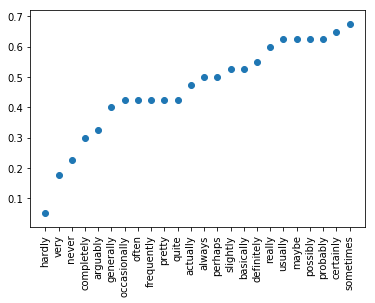

In [22]:
rob_not_ordered = [(i[0], i[1]) for i in sorted(rob_not, key=lambda x: x[1])]
plt.scatter(*zip(*rob_not_ordered))
plt.xticks(rotation=90)
plt.show()
# smallest boosts: negations, arguably and 'very' because frequent..?
# biggest boosts: 6 top are epistemic and temporal (added semantic info?)

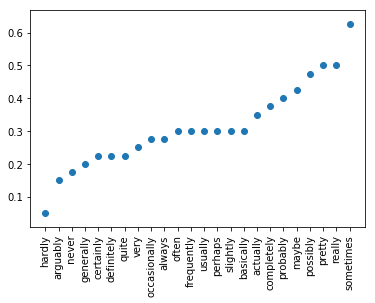

In [23]:
bert_not_ordered = [(i[0], i[1]) for i in sorted(bert_not, key=lambda x: x[1])]
plt.scatter(*zip(*bert_not_ordered))
plt.xticks(rotation=90)
plt.show()
# certainly here gets no boost, so roberta might have learned more about epistemic category

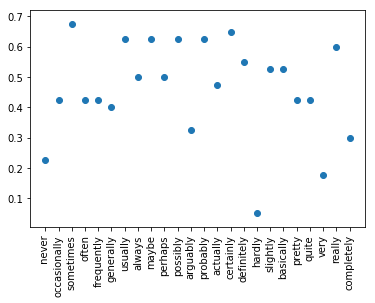

In [11]:
# above_not rob
# doesn't look like there is a logic behind the boost (apart from never and hardly)
rob_not_d = [(i[0], i[1]) for i in rob_not]
plt.scatter(*zip(*rob_not_d))
plt.xticks(rotation=90)
plt.show()

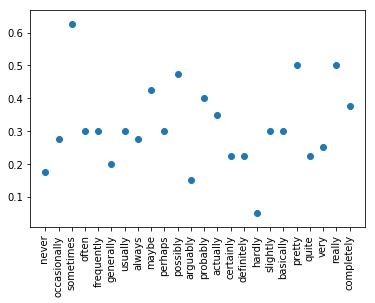

In [12]:
# above_not bert
bert_not_d = [(i[0], i[1]) for i in bert_not]
plt.scatter(*zip(*bert_not_d))
plt.xticks(rotation=90)
plt.show()

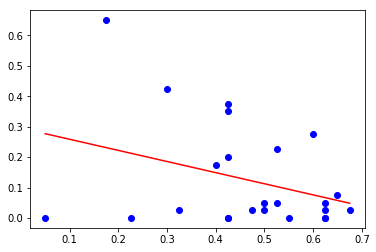

In [18]:
import numpy as np
from scipy import stats
# trying to see if higher frequency words get more (or less context boost)
# should actually be less, looks a bit like that here (less 'room for improvement')
x = np.array([i[1] for i in rob_not])
y = np.array([i[2] for i in rob_not])
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

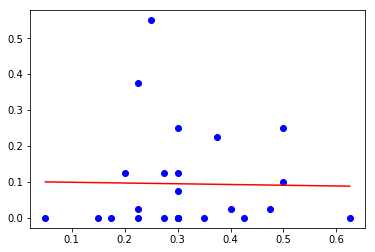

In [16]:
x = np.array([i[1] for i in bert_not])
y = np.array([i[2] for i in bert_not])
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r')
plt.show()

In [57]:
# 320 because 40*8 for each semantic category
for k in above_not:
    for k1 in above_not[k]:
        if type(above_not[k][k1]) != dict:
            print(k, k1, above_not[k][k1]/320) # again, roberta already has targets above not in neutral context
# in bert large, all categories get a 30% boost, in Roberta epistemic gets almost 60% boost, temp 45% and other 40%
# (and that's keeping in mind some of our adv are negations). The boost is quite small in GPT2 
# in general, the epistemic category benefits most from context 

# GPT2 in neutral just has 'is' as left hand context so outputs the same every time (no adverbs and no negation)
# performance is not better for factual despite no negation there 
# !! Roberta is Roberta LARGE 

bert_b temporal 0.215625
bert_b factual 0.1875
bert_b other 0.4
bert_b_neutral temporal 0.021875
bert_b_neutral factual 0.0
bert_b_neutral other 0.08125
bert_l temporal 0.3625
bert_l factual 0.328125
bert_l other 0.53125
bert_l_neutral temporal 0.05625
bert_l_neutral factual 0.009375
bert_l_neutral other 0.21875
roberta temporal 0.525
roberta factual 0.56875
roberta other 0.671875
roberta_neutral temporal 0.0625
roberta_neutral factual 0.021875
roberta_neutral other 0.29375
gpt2 temporal 0.08125
gpt2 factual 0.09375
gpt2 other 0.1625
gpt2_neutral temporal 0.0
gpt2_neutral factual 0.0
gpt2_neutral other 0.0


In [40]:
for k in MRR:
    for k1 in MRR[k]:
        if type(MRR[k][k1]) != dict:
            print(k, k1, MRR[k][k1]/320) # roberta better than bert large esp for epistemic

bert_b temporal 0.10714747847317425
bert_b factual 0.08904616333398396
bert_b other 0.22478405364183987
bert_b_neutral temporal 0.041276107226160895
bert_b_neutral factual 0.01584704929130662
bert_b_neutral other 0.10096478298688841
bert_l temporal 0.15302284517889328
bert_l factual 0.10954695744276115
bert_l other 0.23909293533252352
bert_l_neutral temporal 0.053497613147540125
bert_l_neutral factual 0.019323250685476686
bert_l_neutral other 0.15268750676960285
roberta temporal 0.20854729148518758
roberta factual 0.1834038396781897
roberta other 0.28485661850187144
roberta_neutral temporal 0.03792029962906554
roberta_neutral factual 0.024058698999111998
roberta_neutral other 0.16019737391768746
gpt2 temporal 0.04388930545698883
gpt2 factual 0.05119463359838333
gpt2 other 0.0586358416452631
gpt2_neutral temporal 0.0013573588033604042
gpt2_neutral factual 0.0010149711688514974
gpt2_neutral other 0.0017856184223582201


In [41]:
for k in correct:
    for k1 in correct[k]:
        if type(correct[k][k1]) != dict:
            print(k, k1, correct[k][k1]/320)

bert_b temporal 0.025
bert_b factual 0.025
bert_b other 0.10625
bert_b_neutral temporal 0.0
bert_b_neutral factual 0.0
bert_b_neutral other 0.028125
bert_l temporal 0.046875
bert_l factual 0.028125
bert_l other 0.1125
bert_l_neutral temporal 0.003125
bert_l_neutral factual 0.0
bert_l_neutral other 0.065625
roberta temporal 0.0875
roberta factual 0.071875
roberta other 0.13125
roberta_neutral temporal 0.0
roberta_neutral factual 0.0
roberta_neutral other 0.06875
gpt2 temporal 0.003125
gpt2 factual 0.009375
gpt2 other 0.009375
gpt2_neutral temporal 0.0
gpt2_neutral factual 0.0
gpt2_neutral other 0.0


In [30]:
df_new['adv_exp'] = df_new['adv_exp'].apply(lambda x: str(x))
df_no_neg = df_new[~df_new['adv_exp'].str.contains(" never|hardly")]
len(df_no_neg)

880

In [32]:
for c in ['bert_b', 'bert_b_neutral', 'bert_l', 'bert_l_neutral',
         'roberta', 'roberta_neutral', 'gpt2', 'gpt2_neutral']:
    df_no_neg[c] = df_no_neg[c].apply(lambda x: str(x))
    print(c)
    # top 1 not (! without hardly and never, to compare with contradiction dataset where you don't expect negation)
    print(len([i for i in df_no_neg[c].str.contains("^\(\(0,") if i == True])/880)
    # the effect of context is actually stronger in bert b, then bert l than roberta

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


bert_b
0.20227272727272727
bert_b_neutral
0.4647727272727273
bert_l
0.13522727272727272
bert_l_neutral
0.30113636363636365
roberta
0.08636363636363636
roberta_neutral
0.20795454545454545
gpt2
0.20795454545454545
gpt2_neutral
0.0


In [33]:
for c in ['bert_b', 'bert_b_neutral', 'bert_l', 'bert_l_neutral',
         'roberta', 'roberta_neutral', 'gpt2', 'gpt2_neutral']:
    print(c)
    # top 10 not (! without hardly and never)
    print(len([i for i in df_no_neg[c].str.contains("'not'|' not'") if i == True])/880)
    # for top 10 not the effect of context is stronger in roberta

bert_b
0.615909090909091
bert_b_neutral
0.9386363636363636
bert_l
0.47613636363636364
bert_l_neutral
0.775
roberta
0.3159090909090909
roberta_neutral
0.7431818181818182
gpt2
0.6693181818181818
gpt2_neutral
0.0


In [41]:
import re
from ast import literal_eval

def make_confusion_matrix(df_new, pred_column, deg_adv=deg_adv):
    other_count = 0
    deg_adv_other_not =  ['other'] + deg_adv + ['not']
    confusion_matrix = np.zeros((len(deg_adv), len(deg_adv_other_not)))

    if type(df_new['adv_exp'].iloc[0]) == str:
        df_new['adv_exp'].apply(lambda x: literal_eval(x))

    for idx, p in df_new[pred_column].iteritems():
        adv = df_new['adv_exp'].loc[idx][0]
        adv_idx = deg_adv.index(adv)
        top_10 = p[2]
        counter = 0

        for i in top_10:
            top = i[0]
            if top == 'never':
                top = ' never'
            if 'roberta' in pred_column:
                top = top.strip()
            if top in deg_adv_other_not:
                top_idx = deg_adv_other_not.index(top)
                break
            else:
                counter+=1
                if counter == 10:
                    top_idx = 0
                    other_count+=1

        confusion_matrix[adv_idx][top_idx] +=1
    return confusion_matrix

In [49]:
conf_mat_rob = make_confusion_matrix(df_new=df_new, pred_column='roberta')
conf_mat_bert = make_confusion_matrix(df_new=df_new, pred_column='bert_l')
conf_mat_rob_neut = make_confusion_matrix(df_new=df_new, pred_column='roberta_neutral')
conf_mat_bert_neut = make_confusion_matrix(df_new=df_new, pred_column='bert_l_neutral')

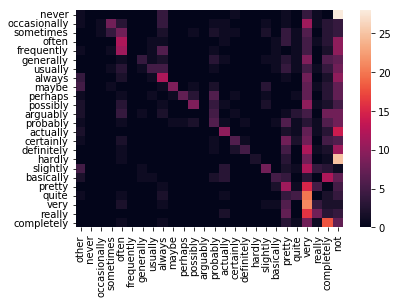

In [46]:
import seaborn as sns
deg_adv_other_not =  ['other'] + deg_adv + ['not']
ax = sns.heatmap(conf_mat_rob, 
            yticklabels = deg_adv,
            xticklabels = deg_adv_other_not)
# sometimes gets confused with occasionally, often with frequently, sometimes and occasionally
# always gets confused with temporal also
# arguably gets confused with epistemic
# pretty gets confused a lot more with 'other' than with temporal or epistemic, same for really 
# very confused across board 

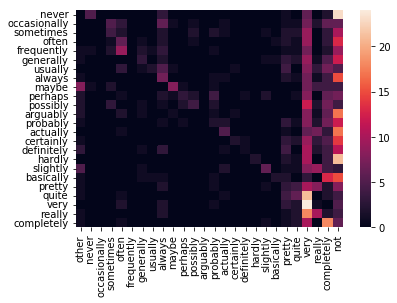

In [48]:
ax = sns.heatmap(conf_mat_bert, 
            yticklabels = deg_adv,
            xticklabels = deg_adv_other_not)

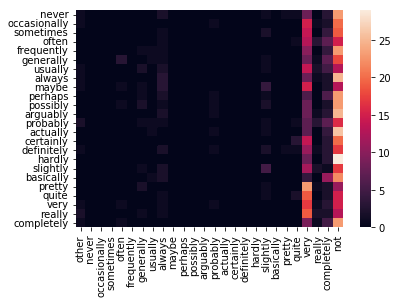

In [51]:
ax = sns.heatmap(conf_mat_bert_neut, 
            yticklabels = deg_adv,
            xticklabels = deg_adv_other_not)

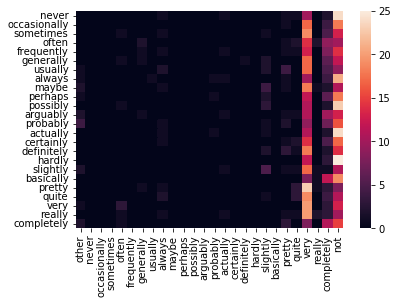

In [50]:
ax = sns.heatmap(conf_mat_rob_neut, 
            yticklabels = deg_adv,
            xticklabels = deg_adv_other_not)

In [171]:
import networkx as nx
# DIFFERENCE BETWEEN DIRECTED AND NOT DIRECTED!
threshold = 0
G = nx.DiGraph()
G.add_nodes_from(deg_adv_other_not)

for advi in deg_adv:
    advi_idx = deg_adv.index(advi)
    for advj in deg_adv_other_not:
        advj_idx = deg_adv_other_not.index(advj)
        conf = conf_mat_rob[advi_idx][advj_idx]
        if conf > threshold:
            G.add_edge(advi, advj, weight = conf)

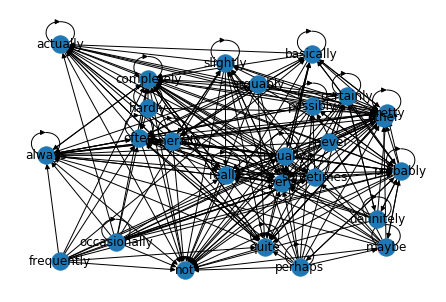

In [152]:
nx.draw(G, with_labels = True, pos = nx.random_layout(G))

In [153]:
from networkx.algorithms.community.centrality import girvan_newman
clusters = girvan_newman(G)
list(clusters)[8] # very interesting, when we cluster, each of the EPISTEMIC adv gets its own cluster! (plus negations)

({'other'},
 {' never'},
 {'actually',
  'always',
  'basically',
  'completely',
  'frequently',
  'generally',
  'not',
  'occasionally',
  'often',
  'pretty',
  'probably',
  'quite',
  'really',
  'slightly',
  'sometimes',
  'usually',
  'very'},
 {'maybe'},
 {'perhaps'},
 {'possibly'},
 {'arguably'},
 {'certainly'},
 {'definitely'},
 {'hardly'})

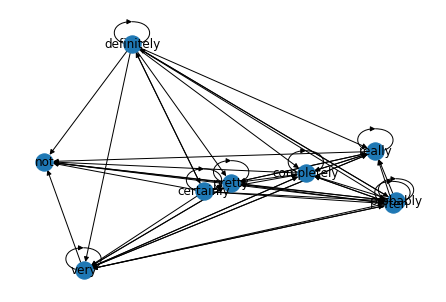

In [172]:
n = [i for i in G.neighbors('definitely')]
G2 = G.subgraph(n)
nx.draw(G2, with_labels = True, pos = nx.random_layout(G2)) 
# does get confused with two epistemic (probably, certainly)

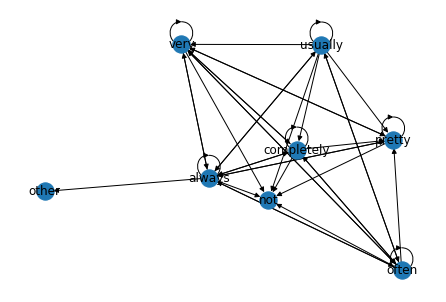

In [178]:
n = [i for i in G.neighbors('always')]
G2 = G.subgraph(n)
nx.draw(G2, with_labels = True, pos = nx.random_layout(G2)) # doesn't get confused with epistemic
# gets confused with two other temporal (usually, often) !! THIS IS WHEN TARGET is always!! 
# always gets confused with other but the other end points don't 

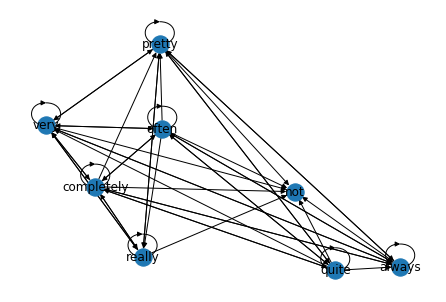

In [177]:
n = [i for i in G.neighbors('completely')]
G2 = G.subgraph(n)
nx.draw(G2, with_labels = True, pos = nx.random_layout(G2)) # doesn't get confused with epistemic (when it's target!)

In [181]:
# df_adj = pd.read_csv('/Users/isabellelorge/Desktop/reddit_data/data_in_progress/final_with_preds_july.csv')

In [198]:
# adj = []
# for s in df_adj['new_neutrals'].iloc[:40]:
#     a = re.sub('\.', '', s.split()[-1])
#     adj.append(a)

In [200]:
# with open('/Users/isabellelorge/Desktop/adj.txt', 'w') as outfile:
#     outfile.write(str(adj))

In [203]:
# df_new['intensity_sent'] = df_adj['new_neutrals']

In [ ]:
# intensity vectors 
# also try the scaling effect! (compare effect on adjective)
# also should we try different adverbs? Ground truth from extreme sentiment maybe or reviews..?
# YAY, all adjectives are one word piece, makes things much easier (word piece is so bad>>??)

In [2]:
# import re
# roberta_adv = []
# roberta_adj = []
# roberta_adj_alone = []
# bertl_adv = []
# bertl_adj = []
# bertl_adj_alone = []
# bertb_adv = []
# bertb_adj = []
# bertb_adj_alone = []


# for i, s in df_new['intensity_sent'].iteritems():
#     print(i)
#     adv = s.split()[-2]
#     print(adv)
#     adj = re.sub('\.', '', s.split()[-1])
#     s_alone = f'is {adj}.'
#     print(adv, adj)
#     roberta_adv.append(bert_predictions.get_bert_token_embedding(s, adv, model_name = 'roberta'))
#     roberta_adj.append(bert_predictions.get_bert_token_embedding(s, adj, model_name = 'roberta'))
#     roberta_adj_alone.append(bert_predictions.get_bert_token_embedding(s_alone, adj, model_name = 'roberta'))
#     bertl_adv.append(bert_predictions.get_bert_token_embedding(s, adv, model_name = 'bert_large'))
#     bertl_adj.append(bert_predictions.get_bert_token_embedding(s, adj, model_name = 'bert_large'))
#     bertl_adj_alone.append(bert_predictions.get_bert_token_embedding(s_alone, adj, model_name = 'bert_large'))
#     bertb_adv.append(bert_predictions.get_bert_token_embedding(s, adv, model_name = 'bert_base'))
#     bertb_adj.append(bert_predictions.get_bert_token_embedding(s, adj, model_name = 'bert_base'))
#     bertb_adj_alone.append(bert_predictions.get_bert_token_embedding(s_alone, adj, model_name = 'bert_base')) 

In [143]:
# df_new['roberta_adv'] = roberta_adv
# df_new['roberta_adj'] = roberta_adj
# df_new['roberta_adj_alone'] = roberta_adj_alone
# df_new['bertl_adv'] = bertl_adv
# df_new['bertl_adj'] = bertl_adj
# df_new['bertl_adj_alone'] = bertl_adj_alone
# df_new['bertb_adv'] = bertb_adv
# df_new['bertb_adj'] = bertb_adj
# df_new['bertb_adj_alone'] = bertb_adj_alone

In [145]:
# df_new = pd.read_csv('/Users/isabellelorge/Desktop/new_dataset_arguably.csv', converters ={'roberta_adj': converter})
df_new_pkl = pd.read_pickle('/Users/isabellelorge/Desktop/new_dataset_arguably.pkl')

In [1]:
# from nltk.sentiment import SentimentIntensityAnalyzer
# import operator
# import numpy as np
# sia = SentimentIntensityAnalyzer()
# sent = []
# sent_alone = []

# for i, s in df_new['intensity_sent'].iteritems():
#     print(i)
#     adj = re.sub('\.', '', s.split()[-1])
#     s_alone = f'is {adj}.'
#     print(adj)
#     se = sia.polarity_scores(s)["compound"]
#     se_al =  sia.polarity_scores(s_alone)["compound"]
#     sent.append(np.abs(se))
#     sent_alone.append(np.abs(se))
# # df["sentiment"] = np.select([df["sentiment_score"] < 0, df["sentiment_score"] == 0, df["sentiment_score"] > 0],
# #                            ['neg', 'neu', 'pos'])
# df_new['sentiment_adj'] = sent
# df_new['sentiment_adj_alone'] = sent_alone

In [2]:
# len(df_new[df_new['sentiment_adj'] == 0])

In [20]:
# import spacy
# import re
# import numpy as np
# from spacytextblob.spacytextblob import SpacyTextBlob

# nlp = spacy.load('en_core_web_sm')
# nlp.add_pipe('spacytextblob')
# sent = []
# sent_alone = []


# for i, s in df_new['intensity_sent'].iteritems():
# #     print(i)
#     adj = re.sub('\.', '', s.split()[-1])
#     s_alone = f'is {adj}.'
#     doc = nlp(s)
#     doc_alone = nlp(s_alone)
#     pol = doc._.blob.polarity 
#     pol_a = doc_alone._.blob.polarity 
#     sent.append(np.abs(pol))
#     sent_alone.append(np.abs(pol_a))
# df_new['sentiment'] = sent
# df_new['sentiment_adj_alone'] = sent_alone

In [150]:
df_new = df_new_pkl

In [151]:
df_new['roberta_adj_diff'] = df_new['roberta_adj'] - df_new['roberta_adj_alone']
df_new['bertl_adj_diff'] = df_new['bertl_adj'] - df_new['bertl_adj_alone']
df_new['bertb_adj_diff'] = df_new['bertb_adj'] - df_new['bertb_adj_alone']

In [149]:
glove_file = '/Users/isabellelorge/Desktop/glove-wiki-gigaword-100'

# glove embeddings
def load_glove_model(file):
    glove_model = {}
    with open(file,'r') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    return glove_model

glove_dict = load_glove_model(glove_file)

In [163]:
# roberta embeddings 
ROBERTA_dict = {}
for i in deg_adv:
#     print(i)
    i_embed = np.mean(df_new['roberta_adv'][df_new['adv_exp'].str.contains(f"'{i}'")], axis = 0)
#     print(i_embed.shape)
    ROBERTA_dict[i] = i_embed

In [164]:
ROBERTA_dict_adj_scaling = {}
for i in deg_adv:
#     print(i)
    i_embed = np.mean(df_new['roberta_adj_diff'][df_new['adv_exp'].str.contains(f"'{i}'")], axis = 0)
#     print(i_embed.shape)
    ROBERTA_dict_adj_scaling[i] = i_embed

In [165]:
BERT_dict_large = {}
for i in deg_adv:
#     print(i)
    i_embed = np.mean(df_new['bertl_adv'][df_new['adv_exp'].str.contains(f"'{i}'")], axis = 0)
#     print(i_embed.shape)
    BERT_dict_large[i] = i_embed

In [166]:
BERT_dict_large_adj_scaling = {}
for i in deg_adv:
#     print(i)
    i_embed = np.mean(df_new['bertl_adj_diff'][df_new['adv_exp'].str.contains(f"'{i}'")], axis = 0)
#     print(i_embed.shape)
    BERT_dict_large_adj_scaling[i] = i_embed

In [167]:
BERT_dict_base = {}
for i in deg_adv:
#     print(i)
    i_embed = np.mean(df_new['bertb_adv'][df_new['adv_exp'].str.contains(f"'{i}'")], axis = 0)
#     print(i_embed.shape)
    BERT_dict_base[i] = i_embed

In [168]:
BERT_dict_base_adj_scaling = {}
for i in deg_adv:
#     print(i)
    i_embed = np.mean(df_new['bertb_adj_diff'][df_new['adv_exp'].str.contains(f"'{i}'")], axis = 0)
#     print(i_embed.shape)
    BERT_dict_base_adj_scaling[i] = i_embed

In [170]:
# !pip3 install scipy
from reddit_analyses.intensity_ranking import get_sim_dict, get_correlations, pairwise_acc

glo_top = get_sim_dict(deg_adv, temporal, factual, other, glove_dict, ref_vector='top')
glo_diff = get_sim_dict(deg_adv, temporal, factual, other, glove_dict, ref_vector='diff')
berta_top = get_sim_dict(deg_adv, temporal, factual, other, ROBERTA_dict, ref_vector='top')
berta_diff = get_sim_dict(deg_adv, temporal, factual, other, ROBERTA_dict, ref_vector='diff')
bertl_top = get_sim_dict(deg_adv, temporal, factual, other, BERT_dict_large, ref_vector='top')
bertl_diff = get_sim_dict(deg_adv, temporal, factual, other, BERT_dict_large, ref_vector='diff')
bertb_top = get_sim_dict(deg_adv, temporal, factual, other, BERT_dict_base, ref_vector='top')
bertb_diff = get_sim_dict(deg_adv, temporal, factual, other, BERT_dict_base, ref_vector='diff')
berta_diff_scaling = get_sim_dict(deg_adv, temporal, factual, other, ROBERTA_dict_adj_scaling, ref_vector='diff')
bertl_diff_scaling = get_sim_dict(deg_adv, temporal, factual, other, BERT_dict_large_adj_scaling, ref_vector='diff')
bertb_diff_scaling = get_sim_dict(deg_adv, temporal, factual, other, BERT_dict_base_adj_scaling, ref_vector='diff')

In [171]:
# taking the difference between adjective and adjective plus adverb works well!

def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

for d in [glo_top, glo_diff, berta_top, berta_diff, bertl_top, bertl_diff, bertb_top, bertb_diff,
         berta_diff_scaling, bertl_diff_scaling, bertb_diff_scaling]:
    print(namestr(d, globals()))
    for cat in [temporal, factual, other]:
        print(cat)
        get_correlations(d, cat)

['d', 'glo_top']
[' never', 'occasionally', 'sometimes', 'often', 'frequently', 'generally', 'usually', 'always']
[('frequently', 0.6598949857506493), ('occasionally', 0.6813485339292799), ('generally', 0.7049326399220962), ('usually', 0.7272833786712252), ('often', 0.7912016996280701), ('sometimes', 0.8126990603855816), (' never', 0.8668310431538021)]
SpearmanrResult(correlation=-0.42857142857142866, pvalue=0.337368311085824)
KendalltauResult(correlation=-0.33333333333333337, pvalue=0.3813492063492063)
['maybe', 'perhaps', 'possibly', 'arguably', 'probably', 'actually', 'certainly', 'definitely']
[('arguably', 0.504830539238902), ('possibly', 0.5521094728674252), ('perhaps', 0.6756634914092626), ('actually', 0.7724717087557347), ('probably', 0.7754335997985543), ('maybe', 0.7929923672085039), ('certainly', 0.9078265295823964)]
SpearmanrResult(correlation=0.28571428571428575, pvalue=0.5345092286010406)
KendalltauResult(correlation=0.14285714285714288, pvalue=0.7726190476190476)
['hardl

In [ ]:
# BERT LARGE and BASE do better with temporal and epistemic, ROBERTA does better with epistemic and other

In [172]:
for d in [berta_top, berta_diff, berta_diff_scaling, bertl_top, bertl_diff, bertl_diff_scaling,
          bertb_top, bertb_diff, bertb_diff_scaling, glo_top, glo_diff]:
    print(namestr(d, globals()), 'Pacc:', pairwise_acc(temporal, factual, other, d))

['d', 'berta_top'] Pacc: 0.31007751937984496
['d', 'berta_diff'] Pacc: 0.49612403100775193
['d', 'berta_diff_scaling'] Pacc: 0.5736434108527132
['d', 'bertl_top'] Pacc: 0.5736434108527132
['d', 'bertl_diff'] Pacc: 0.5271317829457365
['d', 'bertl_diff_scaling'] Pacc: 0.6511627906976745
['d', 'bertb_top'] Pacc: 0.5426356589147286
['d', 'bertb_diff'] Pacc: 0.6046511627906976
['d', 'bertb_diff_scaling'] Pacc: 0.6201550387596899
['d', 'glo_top'] Pacc: 0.4806201550387597
['d', 'glo_diff'] Pacc: 0.4806201550387597


In [3]:
import pandas as pd
from reddit_analyses.extract_phrases import create_contradiction_examples
# df_new = pd.read_pickle('/Users/isabellelorge/Desktop/new_dataset_arguably.pkl')
# synth = create_contradiction_examples(df_new['sentences'])
# df_new['contradiction'] = synth

In [4]:
# df_contr = df_new[(~df_new['adv_exp'].str.contains('never|hardly')) & (df_new['contradiction']!= '')].reset_index(drop =True)

In [11]:
# df_contr[['adv_exp', 'sentences', 'contradiction']].to_csv('/Users/isabellelorge/Desktop/df_contradiction.csv')

In [ ]:
df_contr['contr_bert_b'] = bert_b
df_contr['contr_bert_b_neutral'] = bert_b_neutral
df_contr['contr_bert_l'] = bert_l
df_contr['contr_bert_l_neutral'] = bert_l_neutral
df_contr['contr_roberta'] = berta
df_contr['contr_roberta_neutral'] = berta_neutral

In [33]:
# df_contr.to_pickle('/Users/isabellelorge/Desktop/df_contradiction.pkl')

In [351]:
df_contr = pd.read_pickle('/Users/isabellelorge/Desktop/df_contradiction.pkl')

In [357]:
# df_contr['contradiction'].to_csv('/Users/isabellelorge/Desktop/appendix_data/contradiction.csv')

In [31]:
# get results 
# !! CHECK IF MODELS ARE BETTER WHEN no 'not' (ie better with synonyms than antonyms?)
for c in ['contr_bert_b', 'contr_bert_b_neutral', 'contr_bert_l', 'contr_bert_l_neutral',
         'contr_roberta', 'contr_roberta_neutral']:
    df_contr[c] = df_contr[c].apply(lambda x: str(x))
    print(c)
    # top 1 not (! without hardly and never, to compare with contradiction dataset where you don't expect negation)
    print(len([i for i in df_contr[c].str.contains("^\(\(0,") if i == True])/len(df_contr[c]))
# Talmor et al. (2019) actually really underestimated Roberta's performance: here we have 6 top not, and 19 other = 27
# so (508-27)/508 = 0.95 of top choices were intensifiers 
# ie, 0.02 top not (which is the only contradictory/incorrect choice) vs 0.22 in neutral context. 
# BERT base actually has 10% MORE 'top not'! and BERT large a similar amount (only drops by 5%)

contr_bert_b
0.6043307086614174
contr_bert_b_neutral
0.4862204724409449
contr_bert_l
0.2874015748031496
contr_bert_l_neutral
0.33661417322834647
contr_roberta
0.011811023622047244
contr_roberta_neutral
0.22440944881889763


In [360]:
# df_contr_reverse['sentences'].to_csv('/Users/isabellelorge/Desktop/appendix_data/contradiction_reverse.csv')

In [54]:
# top choices that are not intensifiers: 'getting' (7), 'the'(4), 'politically(2), 'physically'(1), 'internally'(1), 
# 'a' (1), 'mentally'(1), 'deliberately' (1), 'running'(1), 
# for i in df_contr['contr_roberta']:
#     print(i[2][0][0])

In [34]:
for c in ['contr_bert_b', 'contr_bert_b_neutral', 'contr_bert_l', 'contr_bert_l_neutral',
         'contr_roberta', 'contr_roberta_neutral']:
    df_contr[c] = df_contr[c].apply(lambda x: str(x))
    print(c)
    # top 10 not (! without hardly and never, to compare with contradiction dataset where you don't expect negation)

    print(len([i for i in df_contr[c].str.contains("'not'|' not'") if i == True])/len(df_contr[c]))

contr_bert_b
0.9547244094488189
contr_bert_b_neutral
0.9389763779527559
contr_bert_l
0.7244094488188977
contr_bert_l_neutral
0.8051181102362205
contr_roberta
0.07874015748031496
contr_roberta_neutral
0.7716535433070866


In [45]:
from ast import literal_eval
def target_above_not(c):
    above_not = 0
    if type(df_contr[c].iloc[0]) == str:
        df_contr[c] = df_contr[c].apply(lambda x: literal_eval(x))
    for i in df_contr[c]:
        rank_target = i[1][0]
        rank_not = i[0][0]
        if rank_target < rank_not:
            above_not +=1
    return above_not

In [46]:
for c in ['contr_bert_b', 'contr_bert_b_neutral', 'contr_bert_l', 'contr_bert_l_neutral',
         'contr_roberta', 'contr_roberta_neutral']:
    print(c)
    print(target_above_not(c)/len(df_contr[c]))
# that's for 'really' vs. 'not'
# why the difference with Talmor et al. (2019) results..? the MLP..? Or the different dataset..? (more curated..!)
# the MLP shouldn't make a difference: without retraining weights, the prob of really/not should stay higher/lower

contr_bert_b
0.017716535433070866
contr_bert_b_neutral
0.04330708661417323
contr_bert_l
0.16141732283464566
contr_bert_l_neutral
0.09448818897637795
contr_roberta
0.5511811023622047
contr_roberta_neutral
0.11023622047244094


In [ ]:
# heatmaps

In [ ]:
# graph

In [76]:
import re
with open('/Users/isabellelorge/Desktop/adj.txt','r') as f:
        for line in f:
            adj = [re.sub("\[|\]|'", '', i.strip()) for i in line.split(',')]

In [88]:
# INTENSITY ENTAILMENT TASK (RE-MAKE DATASET WITH NEW ADV) (=> PERPLEXITY)
int_entail_df = pd.DataFrame()
intensity_entail = []
labels = []

for a in temporal[1:]:
    for a2 in temporal[1:]:
        for aj in adj:
            if a != a2:
                intensity_entail.append(f'If it is {a} {aj}, then it is {a2} {aj}')
                intensity_entail.append(f'If it is {a2} {aj}, then it is {a} {aj}')
                if temporal.index(a) > temporal.index(a2):
                    labels.extend([1, 0])
                else:
                    labels.extend([0, 1])
for a in other[1:]:
    for a2 in other[1:]:
        for aj in adj:
            if a != a2:
                intensity_entail.append(f'If it is {a} {aj}, then it is {a2} {aj}')
                intensity_entail.append(f'If it is {a2} {aj}, then it is {a} {aj}')
                if other.index(a) > other.index(a2):
                    labels.extend([1, 0])
                else:
                    labels.extend([0, 1])
for a in factual:
    for a2 in factual:
        for aj in adj:
            if a != a2:
                intensity_entail.append(f'If it is {a} {aj}, then it is {a2} {aj}')
                intensity_entail.append(f'If it is {a2} {aj}, then it is {a} {aj}')
                if factual.index(a) > factual.index(a2):
                    labels.extend([1, 0])
                else:
                    labels.extend([0, 1])

int_entail_df['sent'] = intensity_entail
int_entail_df['labels'] = labels

In [195]:
# int_entail_df.to_csv('/Users/isabellelorge/Desktop/intensity_entailment.csv')

In [2]:
import pandas as pd
int_entail_df = pd.read_csv('/Users/isabellelorge/Desktop/intensity_entailment.csv')

In [3]:
from transformers import AutoModelForMaskedLM, AutoTokenizer
import torch
import numpy as np

# model_name = 'bert-base-cased'
# model_name = 'bert-large-cased'
model_name = 'roberta-large'
model_torch_berta = AutoModelForMaskedLM.from_pretrained(model_name)
tokenizer_torch_berta = AutoTokenizer.from_pretrained(model_name)

def score(sentence, model, tokenizer):
    tensor_input = tokenizer.encode(sentence, return_tensors='pt')
    # repeat as much as there are non-special tokens (tokens -2), ie 7 times and only once along the other dimension
    repeat_input = tensor_input.repeat(tensor_input.size(-1)-2, 1)
    # mask where matrix == 1 with mask token
    mask = torch.ones(tensor_input.size(-1) - 1).diag(1)[:-2]
    # replace everything in mask matrix by the mask token, all the rest is original ids
    masked_input = repeat_input.masked_fill(mask == 1, tokenizer.mask_token_id)
    # put labels of masked tokens, use -100 for everything else (? don't need labels for non masked tokens)
    labels = repeat_input.masked_fill(masked_input != tokenizer.mask_token_id, -100)
    with torch.inference_mode():
        loss = model(masked_input, labels=labels).loss
    return np.exp(loss.item())

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [240]:
# because Roberta performed so much better on the contradiction dataset and for computational reasons we only report
# its performance 
perplexities = []

for i, s in df_lex_entail['sentences'].loc[851:].iteritems():
    print(i)
    perp = score(s, model_torch_berta, tokenizer_torch_berta)
    perplexities.append(perp)
    
# the original MoNLI paper had not tested ROBERTA and not tested in zero-shot setting

851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080

In [237]:
# with open('/Users/isabellelorge/Desktop/perp_backup_lex_entail_14aug.txt','w') as f:
#         f.write('\n'.join([str(i) for i in perplexities]))

In [243]:
# perp_first = []
# with open('/Users/isabellelorge/Desktop/perp_backup_lex_entail_14aug.txt','r') as f:
#     for l in f:
#         perp_first.append(l.strip())

In [244]:
# perp_final = perp_first+perplexities

In [234]:
# small_df_int_entail.to_csv('/Users/isabellelorge/Desktop/small_df_int_entail.csv')

In [248]:
# df_lex_entail['perplexities'] = perp_final

In [228]:
# df_lex_entail['sentences'] = df_lex_entail['sentences'].apply(lambda x: re.sub('then', 'then we know', x))

In [521]:
df_lex_entail.to_csv('/Users/isabellelorge/Desktop/df_lex_entail.csv')

In [327]:
# print(score('If the man has a robin, then we know the man has a bird. ', model_torch_berta, tokenizer_torch_berta))
# print(score('If the man has a bird, then we know the man has a robin. ', model_torch_berta, tokenizer_torch_berta))

In [326]:
# print(score('If it is certainly true, then it is at least maybe true. ', model_torch_berta, tokenizer_torch_berta))
# print(score('If it is maybe true, then it is at least certainly true. ', model_torch_berta, tokenizer_torch_berta))

In [147]:
# with open('/Users/isabellelorge/Desktop/perp_backup_int_entail.txt','w') as f:
#         f.write('\n'.join([str(i) for i in perplexities]))
# 0-3978

In [10]:
# perp_first = []
# with open('/Users/isabellelorge/Desktop/perp_backup_int_entail.txt','r') as f:
#     for l in f:
#         perp_first.append(l.strip())

In [14]:
# int_entail_df['perplexities'] = perp_full

In [30]:
# int_entail_df['perplexities']=int_entail_df['perplexities'].apply(lambda x: float(x))

In [193]:
# int_entail_df['sent'] = int_entail_df['sent'].apply(lambda x: x + '.')

In [198]:
# small_df_int_entail = int_entail_df[int_entail_df['sent'].str.contains('bad|big|clear')]

In [ ]:
# small_df_int_entail['sent'] = small_df_int_entail['sent'].apply(lambda x: re.sub('then it is', 'then it is at least',x))

In [255]:
# df_lex_entail['perplexities']=df_lex_entail['perplexities'].apply(lambda x:float(x))

In [260]:
# small_entail_df=pd.read_csv('/Users/isabellelorge/Desktop/small_df_int_entail.csv')

In [271]:
# df_lex_entail =pd.read_csv('/Users/isabellelorge/Desktop/df_lex_entail.csv')

In [262]:
small_entail_df['perplexities'][small_entail_df['labels']==1].mean()

3.995068906329359

In [261]:
small_entail_df['perplexities'][small_entail_df['labels']==0].mean()

4.345699125369862

In [272]:
df_lex_entail['perplexities'][df_lex_entail['labels']==1].mean()

1.9473515725144974

In [273]:
df_lex_entail['perplexities'][df_lex_entail['labels']==0].mean()

2.014381977776043

In [296]:
score_lexical_entail = 0
errors=0
for i, p in df_lex_entail['perplexities'].iteritems():
    if i%2 == 0:
        if df_lex_entail['labels'].loc[i] == 0 and df_lex_entail['labels'].loc[i+1]==1:
#         print(df_lex_entail['sentences'].loc[i], df_lex_entail['sentences'].loc[i+1])
            if df_lex_entail['perplexities'].loc[i+1]<df_lex_entail['perplexities'].loc[i]:
                score_lexical_entail+=1
        elif df_lex_entail['perplexities'].loc[i+1]>df_lex_entail['perplexities'].loc[i]:
            score_lexical_entail+=1

In [324]:
score_lexical_entail/len(df_lex_entail[df_lex_entail['labels']==1])

0.7154471544715447

In [316]:
score_intensity_entail = 0
for i, p in small_entail_df['perplexities'].iteritems():
#     print(i)
    if i%2 == 0:
        if small_entail_df['labels'].loc[i] == 0 and small_entail_df['labels'].loc[i+1]==1:
#         print(int_entail_df['sent'].loc[i], int_entail_df['sent'].loc[i+1])
            if small_entail_df['perplexities'].loc[i+1] < small_entail_df['perplexities'].loc[i]:
                score_intensity_entail+=1
        elif small_entail_df['perplexities'].loc[i+1] > small_entail_df['perplexities'].loc[i]:
            score_intensity_entail+=1

In [325]:
score_intensity_entail/len(small_entail_df[small_entail_df['labels']==1])

0.6714285714285714

In [37]:
# LEXICAL ENTAILMENT (adapt MoNLI) (=> PERPLEXITY)
# lines = []
# with open('/Users/isabellelorge/Desktop/PMoNLI.txt','r') as f:
#     for l in f:
#         lines.append(l.strip())

In [48]:
# from ast import literal_eval
# df_lex_entail = pd.DataFrame()
# sentences = []
# labels = []
# for l in lines:
#     l_dict = literal_eval(l)
#     first_sent = l_dict['sentence1'].lower()[:-1]
#     sec_sent = l_dict['sentence2'].lower()[:-1]
#     s = f'If {first_sent}, then {sec_sent}.'
#     if l_dict['gold_label'] == 'neutral':
#         labels.append(0)
#     else:
#         labels.append(1)
#     print(s)
#     sentences.append(s)

In [45]:
# df_lex_entail['sentences'] = sentences
# df_lex_entail['labels'] = labels

In [79]:
#REVERSE CONTRADICTION TASK (where 'NOT' is ALWAYS the correct option)
# df_contr = pd.read_pickle('/Users/isabellelorge/Desktop/df_contradiction.pkl')

In [163]:
# import re
# reverse_contr = []
# for s in df_contr['contradiction']:
# #     print(s)
#     if 'I do not think it' in s:
#         s = re.sub('I do not think it', 'It', s)
#     elif 'I think it is' in s:
#         s = re.sub('I think it is', 'It is not', s)
#     elif 'not' in s:
# #         print(s)
#         s = re.sub('not', '', s)
#     else:
#         s = re.sub('It is', 'It is not', s)
    
#     s = re.sub('In fact', 'Indeed', s)
#     s = ' '.join(s.split())
#     print(s)
#     reverse_contr.append(s)

In [159]:
# df_contr_reverse = pd.DataFrame()
# df_contr_reverse['sentences'] = reverse_contr

In [168]:
# df_contr_reverse.to_pickle('/Users/isabellelorge/Desktop/df_contr_reverse.pkl')

In [170]:
for c in ['contr_bert_b', 'contr_bert_b_neutral', 'contr_bert_l', 'contr_bert_l_neutral',
         'contr_roberta', 'contr_roberta_neutral']:
    df_contr_reverse[c] = df_contr_reverse[c].apply(lambda x: str(x))
    print(c)
    # top 1 not (! without hardly and never, to compare with contradiction dataset where you don't expect negation)
    print(len([i for i in df_contr_reverse[c].str.contains("^\(\(0,") if i == True])/len(df_contr_reverse[c]))

contr_bert_b
0.797244094488189
contr_bert_b_neutral
0.4862204724409449
contr_bert_l
0.718503937007874
contr_bert_l_neutral
0.33661417322834647
contr_roberta
0.8346456692913385
contr_roberta_neutral
0.22440944881889763


In [364]:
# TRY to get predictions to corroborate perplexity results on intensity entailment task

# df_int_entail = pd.read_csv('/Users/isabellelorge/Desktop/small_df_int_entail.csv')

In [368]:
# df_int_entail.to_csv('/Users/isabellelorge/Desktop/small_df_int_entail.csv')

In [ ]:
# MASKED NOUN PREDICTION (but there's a lot more nouns to choose from..? Create neutral context..?)

In [488]:
# print(len(df_contr_reverse['contr_roberta'][~df_contr_reverse['contr_roberta'].str.contains('\(0,')]))

83


In [553]:
# df_reduced_lex_entail = df_lex_entail.drop_duplicates(subset='masked').reset_index(drop=True)
# df_reduced_lex_entail = df_reduced_lex_entail.drop_duplicates(subset='target1').reset_index(drop=True)
# df_reduced_lex_entail.to_csv('/Users/isabellelorge/Desktop/df_reduced_lex_entail.csv')

In [549]:
# IN CORRECT lexical case: 'IF taxi => car', we accept both taxi AND car (asymmetric then..?)
# in INCORRECT 'IF car =/> taxi' we accept 'taxi' but not 'car'
# can we use same metric as intensity..? (need to change intensity metric to accept same..?)
# or just count 'correct' answers..? but we don't know here because no scale...

In [ ]:
# FOR INTENSITY, in CORRECT: 'IF always=> sometimes' we accept always AND sometimes (asymmetric then..?)
# we checked if we had more target completions in correct than incorrect...but that's unfair with eg 'car'
# INCORRECT 'IF sometimes /=>ALWAYS' we accept 'sometimes' but not 'always'
# we can compare number of incorrect answers between the two tasks but nothing else...?

In [641]:
# df_int_entail = pd.read_csv('/Users/isabellelorge/Desktop/intensity_entailment.csv')

In [642]:
# masked = []

# for s in df_int_entail['sent']:
#     masked_s = s.split()
#     masked_s[-2] = '[MASK]'
#     masked.append(' '.join(masked_s))
# df_int_entail['masked'] = masked
# df_reduced_int_entail = df_int_entail.drop_duplicates(subset='masked').reset_index(drop=True)

In [676]:
# df_reduced_int_entail['sent'] = df_reduced_int_entail['sent'].apply(lambda x: re.sub('then it is', 'then it is at least', x))

In [700]:
df_reduced_int_entail.to_csv('/Users/isabellelorge/Desktop/df_reduced_int_entail_no_bottom.csv')

In [630]:
df_reduced_int_entail = pd.read_csv('/Users/isabellelorge/Desktop/df_reduced_int_entail_no_bottom.csv')

In [673]:
# df_reduced_int_entail = df_reduced_int_entail[df_reduced_int_entail['labels']==1]
# df_reduced_int_entail.to_csv('/Users/isabellelorge/Desktop/df_reduced_int_entail_no_bottom.csv')

In [641]:
# df_reduced_int_entail['roberta_atleast'] = df_reduced_int_entail['roberta_atleast'].apply(lambda x: literal_eval(x))
# df_reduced_int_entail['bert_l_atleast'] = df_reduced_int_entail['bert_l_atleast'].apply(lambda x: literal_eval(x))
# df_reduced_int_entail['bert_b_atleast'] = df_reduced_int_entail['bert_b_atleast'].apply(lambda x: literal_eval(x))

In [683]:
correct_int_roberta = []
errors_int_roberta = []
other_answer_int_roberta = []
correct_int_bertl =[]
errors_int_bertl = []
other_answer_int_bertl = []
correct_int_bertb =[]
errors_int_bertb = []
other_answer_int_bertb = []

for i, r in df_reduced_int_entail['roberta'].iteritems():
    adv = df_reduced_int_entail['sent'].loc[i].split(',')[0].split()[-2]
    top_pred = r[2][0][0]
    if top_pred.strip() == 'not' or top_pred.strip() == 'never':
        errors_int_roberta.append((adv, top_pred.strip()))
    for c in [temporal, factual, other]:
        if adv in c and top_pred.strip() in c:
            if (c.index(top_pred.strip()) > c.index(adv.strip())):
                errors_int_roberta.append((adv, top_pred.strip()))
            if c.index(top_pred.strip()) < c.index(adv.strip()):
                correct_int_roberta.append((adv, top_pred.strip()))
        elif adv in c and top_pred.strip() not in c:
            other_answer_int_roberta.append((adv, top_pred.strip()))
for i, r in df_reduced_int_entail['bert_l'].iteritems():
    adv = df_reduced_int_entail['sent'].loc[i].split(',')[0].split()[-2]
    top_pred = r[2][0][0]
    if top_pred.strip() == 'not' or top_pred.strip() == 'never':
        errors_int_bertl.append((adv, top_pred.strip()))
    for c in [temporal, factual, other]:
        if adv in c and top_pred.strip() in c:
            if (c.index(top_pred.strip()) > c.index(adv.strip())):
                errors_int_bertl.append((adv, top_pred.strip()))
            if c.index(top_pred.strip()) < c.index(adv.strip()):
                correct_int_bertl.append((adv, top_pred.strip()))
        elif adv in c and top_pred.strip() not in c:
            other_answer_int_bertl.append((adv, top_pred.strip()))
for i, r in df_reduced_int_entail['bert_b'].iteritems():
    adv = df_reduced_int_entail['sent'].loc[i].split(',')[0].split()[-2]
    top_pred = r[2][0][0]
    if top_pred.strip() == 'not' or top_pred.strip() == 'never':
        errors_int_bertb.append((adv, top_pred.strip()))
    for c in [temporal, factual, other]:
        if adv in c and top_pred.strip() in c:
            if (c.index(top_pred.strip()) > c.index(adv.strip())):
                errors_int_bertb.append((adv, top_pred.strip()))
            if c.index(top_pred.strip()) < c.index(adv.strip()):
                correct_int_bertb.append((adv, top_pred.strip()))
        elif adv in c and top_pred.strip() not in c:
            other_answer_int_bertb.append((adv, top_pred.strip()))

In [684]:
# trivial completions
print(len(df_reduced_int_entail) - len(other_answer_int_roberta) - len(correct_int_roberta)-len(errors_int_roberta))
print(len(df_reduced_int_entail) - len(other_answer_int_bertl) - len(correct_int_bertl)-len(errors_int_bertl))
print(len(df_reduced_int_entail) - len(other_answer_int_bertb) - len(correct_int_bertb)-len(errors_int_bertb))

49
162
188


In [685]:
other_answer_int_roberta

[('sometimes', 'somewhat'),
 ('sometimes', 'mostly'),
 ('sometimes', 'mostly'),
 ('sometimes', 'somewhat'),
 ('sometimes', 'somewhat'),
 ('sometimes', 'partially'),
 ('sometimes', 'partially'),
 ('sometimes', 'half'),
 ('sometimes', 'partially'),
 ('sometimes', 'somewhat'),
 ('sometimes', 'somewhat'),
 ('sometimes', 'somewhat'),
 ('sometimes', 'somewhat'),
 ('sometimes', 'theoretically'),
 ('sometimes', 'partially'),
 ('sometimes', 'somewhat'),
 ('sometimes', 'somewhat'),
 ('sometimes', 'mostly'),
 ('sometimes', 'somewhat'),
 ('sometimes', 'mostly'),
 ('often', 'somewhat'),
 ('often', 'mostly'),
 ('often', 'somewhat'),
 ('often', 'somewhat'),
 ('often', 'somewhat'),
 ('often', 'somewhat'),
 ('often', 'somewhat'),
 ('often', 'partially'),
 ('often', 'half'),
 ('often', 'somewhat'),
 ('often', 'somewhat'),
 ('often', 'somewhat'),
 ('often', 'somewhat'),
 ('often', 'somewhat'),
 ('often', 'somewhat'),
 ('often', 'somewhat'),
 ('often', 'somewhat'),
 ('often', 'somewhat'),
 ('often', 'some

In [686]:
len(correct_int_roberta)/len(df_reduced_int_entail)

0.03684210526315789

In [687]:
len(errors_int_roberta)/len(df_reduced_int_entail)

0.09342105263157895

In [688]:
print('percent correct roberta', len(correct_int_roberta)/(len(errors_int_roberta)+len(correct_int_roberta)))
print('percent correct bertl',len(correct_int_bertl)/(len(errors_int_bertl)+len(correct_int_bertl)))
print('percent correct bertb',len(correct_int_bertb)/(len(errors_int_bertb)+len(correct_int_bertb)))

percent correct roberta 0.2828282828282828
percent correct bertl 0.6440677966101694
percent correct bertb 0.2682926829268293


In [689]:
# out of the completions within category (or negations), ie where we can say an answer is incorrect
print('percent incorrect roberta', len(errors_int_roberta)/(len(errors_int_roberta)+len(correct_int_roberta)))
print('percent incorrect bertl',len(errors_int_bertl)/(len(errors_int_bertl)+len(correct_int_bertl)))
print('percent incorrect bertb',len(errors_int_bertb)/(len(errors_int_bertb)+len(correct_int_bertb)))

percent incorrect roberta 0.7171717171717171
percent incorrect bertl 0.3559322033898305
percent incorrect bertb 0.7317073170731707


In [690]:
print('within category completions roberta', 1-(len(other_answer_int_roberta)/len(df_reduced_int_entail)))
print('within category completions bertl', 1-(len(other_answer_int_bertl)/len(df_reduced_int_entail)))
print('within category completions bertb', 1-(len(other_answer_int_bertb)/len(df_reduced_int_entail)))

within category completions roberta 0.1947368421052632
within category completions bertl 0.2907894736842105
within category completions bertb 0.3013157894736842


In [450]:
# df_lex_entail = pd.read_csv('/Users/isabellelorge/Desktop/df_lex_entail.csv')

In [577]:
# masked2 = []
# for idx, s in new_lex_df['sentences'].iteritems():
#     print(idx)
#     print(s)
#     target2 = new_lex_df['target'].loc[idx]
#     words = [re.sub('\.|,', '', w) for w in s.split()]
#     i = words.index(target2)
#     print(target2, words[i])
#     words[i] = '[MASK]'
#     masked_s = ' '.join(words)
#     print(masked_s)
#     masked2.append(masked_s)
    

In [456]:
# df_lex_entail = df_lex_entail.drop_duplicates(subset='masked2')
# df_lex_entail['masked2'] = df_lex_entail['masked2'].apply(lambda x: x + '.')

In [498]:
# df_lex_entail = df_lex_entail[df_lex_entail['labels']==1]

In [521]:
# df_lex_entail = pd.read_csv('/Users/isabellelorge/Desktop/df_lex_entail_new.csv')

In [526]:
# new_lex_df = pd.DataFrame()
# for t in df_lex_entail['target'].unique():
#     df_t = df_lex_entail[df_lex_entail['target']==t].sort_values('freq', ascending=False)
#     reduced = df_t.iloc[:5]
#     new_lex_df = pd.concat([new_lex_df, reduced])

In [519]:
# df_lex_entail.to_csv('/Users/isabellelorge/Desktop/df_lex_entail_new.csv')

In [622]:
new_lex_df.to_pickle('/Users/isabellelorge/Desktop/df_lex_entail_reduced_by_freq.pkl')

In [656]:
correct_rob = 0
for idx, i in new_lex_df['roberta'].iteritems():
    target = new_lex_df['target'].loc[idx]
    hint = new_lex_df['target1'].loc[idx]
    top = i[2][0][0]
#     if top.strip() == target.strip():
    if top.strip() == hint:
        correct_rob += 1

In [659]:
correct_rob

161

In [624]:
correct_bertl = 0
for idx, i in new_lex_df['bert_l'].iteritems():
    target = new_lex_df['target'].loc[idx]
    top = i[2][0][0]
    if top.strip() == target.strip():
        correct_bertl += 1

In [625]:
correct_bertb = 0
for idx, i in new_lex_df['bert_b'].iteritems():
    target = new_lex_df['target'].loc[idx]
    top = i[2][0][0]
    if top.strip() == target.strip():
        correct_bertb += 1

In [651]:
correct_rob/len(new_lex_df) # without trivial 

0.25

In [626]:
correct_bertl/len(new_lex_df)

0.2423076923076923

In [627]:
correct_bertb/len(new_lex_df)

0.2230769230769231

In [654]:
len(new_lex_df['target'].unique())

73

In [655]:
correct_rob

65

In [580]:
# import spacy

# nlp = spacy.load("en_core_web_sm")
# sent_fixed = []
# for i, s in new_lex_df['sentences'].iteritems():
#     s_no_know = re.sub('we know', '', s)
#     doc = nlp(s_no_know)
#     pos = [(token.tag_, token.i) for token in doc if token.tag_ in ['VBP', 'VBZ']]
# #     print(pos)
#     vbg = [(token.tag_, token.i) for token in doc if token.tag_ =='VBG']
#     if pos == [] and vbg == []:
#         print(i)
#         print(s)

In [755]:
correct_lex_roberta = []
errors_lex_roberta = []
other_answer_lex_roberta = []
correct_lex_bertl = []
errors_lex_bertl = []
other_answer_lex_bertl = []
correct_lex_bertb = []
errors_lex_bertb = []
other_answer_lex_bertb = []

for i, r in df_reduced_lex_entail['roberta'].iteritems():
    label = df_reduced_lex_entail['labels'].loc[i]
    hint = df_reduced_lex_entail['target'].loc[i]
    target = df_reduced_lex_entail['target1'].loc[i]
#     print(df_reduced_lex_entail['masked'].loc[i])
    top_pred = r[2][0][0]
#     print(r)
#     print(top_pred.strip(), hint, target)
    
    if int(label) == 1:
        if top_pred.strip() == target:
            correct_lex_roberta.append((top_pred.strip(), hint))
        else:
            other_answer_lex_roberta.append((top_pred.strip(), hint))
    elif int(label) == 0:
        if top_pred.strip() == target:
            errors_lex_roberta.append((top_pred.strip(), hint))
        else:
            other_answer_lex_roberta.append((top_pred.strip(), hint))


for i, r in df_reduced_lex_entail['bert_l'].iteritems():
    label = df_reduced_lex_entail['labels'].loc[i]
    hint = df_reduced_lex_entail['target'].loc[i]
    target = df_reduced_lex_entail['target1'].loc[i]
#     print(df_reduced_lex_entail['masked'].loc[i])
    top_pred = r[2][0][0]
#     print(r)
#     print(top_pred.strip(), hint, target)
    
    if int(label) == 1:
        if top_pred.strip() == target:
            correct_lex_bertl.append((top_pred.strip(), hint))
        else:
            other_answer_lex_bertl.append((top_pred.strip(), hint))
    elif int(label) == 0:
        if top_pred.strip() == target:
            errors_lex_bertl.append((top_pred.strip(), hint))
        else:
            other_answer_lex_bertl.append((top_pred.strip(), hint))
            
for i, r in df_reduced_lex_entail['bert_b'].iteritems():
    label = df_reduced_lex_entail['labels'].loc[i]
    hint = df_reduced_lex_entail['target'].loc[i]
    target = df_reduced_lex_entail['target1'].loc[i]
#     print(df_reduced_lex_entail['masked'].loc[i])
    top_pred = r[2][0][0]
#     print(r)
#     print(top_pred.strip(), hint, target)
    
    if int(label) == 1:
        if top_pred.strip() == target:
            correct_lex_bertb.append((top_pred.strip(), hint))
        else:
            other_answer_lex_bertb.append((top_pred.strip(), hint))
    elif int(label) == 0:
        if top_pred.strip() == target:
            errors_lex_bertb.append((top_pred.strip(), hint))
        else:
            other_answer_lex_bertb.append((top_pred.strip(), hint))       

In [757]:
# for cases where higher level word is the hint, errors are not well defined, so we keep the cases 
# where we know for sure what an incorrect answer looks like, ie where hyponym comes second
# to compare with intensity, out of all cases where errors are defined, only 24% are definite errors whereas 
# for intensity it is 40% (BERT large) and up to 75% (ROBERTA) (in fact for lexical entailment it looks like
# other answers are trivial completions most of the time, which are technically correct if uninformative)
print('roberta errors:', len(errors_lex_roberta)/(len(df_reduced_lex_entail[df_reduced_lex_entail['labels']==0])))
print('bertl errors:', len(errors_lex_bertl)/(len(df_reduced_lex_entail[df_reduced_lex_entail['labels']==0])))
print('bertb:', len(errors_lex_bertb)/(len(df_reduced_lex_entail[df_reduced_lex_entail['labels']==0])))

roberta errors: 0.2361878453038674
bertl errors: 0.2154696132596685
bertb: 0.23066298342541436


In [ ]:
# try to see how the models do in zero shot on NMoNLI..? (since children can do the reverse entailment)